importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

reading dataset


In [ ]:
df = pd.read_csv(r'Student Depression Dataset.csv')
df.head(10)

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   
5  33    Male  29.0           Pune    Student                2.0   
6  52    Male  30.0          Thane    Student                3.0   
7  56  Female  30.0        Chennai    Student                2.0   
8  59    Male  28.0         Nagpur    Student                3.0   
9  62    Male  31.0         Nashik    Student                2.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   
5            0.0  5.70                 3.0               0.0   
6            0.0  9.54                 4.0               0.0   
7            0.0  8.04                 4.0               0.0   
8            0.0  9.79                 1.0               0.0   
9            0.0  8.38                 3.0               0.0   

      Sleep Duration Dietary Habits    Degree  \
0          5-6 hours        Healthy   B.Pharm   
1          5-6 hours       Moderate       BSc   
2  Less than 5 hours        Healthy        BA   
3          7-8 hours       Moderate       BCA   
4          5-6 hours       Moderate    M.Tech   
5  Less than 5 hours        Healthy       PhD   
6          7-8 hours        Healthy       BSc   
7  Less than 5 hours      Unhealthy  Class 12   
8          7-8 hours       Moderate      B.Ed   
9  Less than 5 hours       Moderate       LLB   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   
5                                    No               4.0               1.0   
6                                    No               1.0               2.0   
7                                    No               0.0               1.0   
8                                   Yes              12.0               3.0   
9                                   Yes               2.0               5.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0  
5                               No           0  
6                               No           0  
7                              Yes           0  
8                               No           1  
9                               No           1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe().T

count          mean           std   min       25%  \
id                  27901.0  70442.149421  40641.175216   2.0  35039.00   
Age                 27901.0     25.822300      4.905687  18.0     21.00   
Academic Pressure   27901.0      3.141214      1.381465   0.0      2.00   
Work Pressure       27901.0      0.000430      0.043992   0.0      0.00   
CGPA                27901.0      7.656104      1.470707   0.0      6.29   
Study Satisfaction  27901.0      2.943837      1.361148   0.0      2.00   
Job Satisfaction    27901.0      0.000681      0.044394   0.0      0.00   
Work/Study Hours    27901.0      7.156984      3.707642   0.0      4.00   
Financial Stress    27898.0      3.139867      1.437347   1.0      2.00   
Depression          27901.0      0.585499      0.492645   0.0      0.00   

                         50%        75%       max  
id                  70684.00  105818.00  140699.0  
Age                    25.00      30.00      59.0  
Academic Pressure       3.00       4.00       5.0  
Work Pressure           0.00       0.00       5.0  
CGPA                    7.77       8.92      10.0  
Study Satisfaction      3.00       4.00       5.0  
Job Satisfaction        0.00       0.00       4.0  
Work/Study Hours        8.00      10.00      12.0  
Financial Stress        3.00       4.00       5.0  
Depression              1.00       1.00       1.0

df.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.isnull().sum() # checking the sum of null entries in the dataset

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [ ]:
df['Financial Stress'].value_counts() #count and display the number of occurrences of each unique value

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [ ]:
df[df['Financial Stress'].isnull()] # printing rows containg null values

id  Gender   Age       City Profession  Academic Pressure  \
4458   22377  Female  32.0   Varanasi    Student                3.0   
13596  68910    Male  29.0  Hyderabad    Student                2.0   
19266  97610  Female  20.0    Kolkata    Student                1.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
4458             0.0  5.64                 1.0               0.0   
13596            0.0  8.94                 3.0               0.0   
19266            0.0  6.83                 1.0               0.0   

          Sleep Duration Dietary Habits Degree  \
4458           5-6 hours        Healthy    BCA   
13596  Less than 5 hours      Unhealthy   B.Ed   
19266          5-6 hours        Healthy   MBBS   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
4458                                     No              12.0   
13596                                    No              12.0   
19266                                    No               9.0   

       Financial Stress Family History of Mental Illness  Depression  
4458                NaN                               No           1  
13596               NaN                              Yes           0  
19266               NaN                              Yes           0

In [ ]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [ ]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mode().iloc[0])
# replacing null values with "MODE"


In [ ]:
df.info() # checking null values again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe().T

count          mean           std   min       25%  \
id                  27901.0  70442.149421  40641.175216   2.0  35039.00   
Age                 27901.0     25.822300      4.905687  18.0     21.00   
Academic Pressure   27901.0      3.141214      1.381465   0.0      2.00   
Work Pressure       27901.0      0.000430      0.043992   0.0      0.00   
CGPA                27901.0      7.656104      1.470707   0.0      6.29   
Study Satisfaction  27901.0      2.943837      1.361148   0.0      2.00   
Job Satisfaction    27901.0      0.000681      0.044394   0.0      0.00   
Work/Study Hours    27901.0      7.156984      3.707642   0.0      4.00   
Financial Stress    27901.0      3.140067      1.437399   1.0      2.00   
Depression          27901.0      0.585499      0.492645   0.0      0.00   

                         50%        75%       max  
id                  70684.00  105818.00  140699.0  
Age                    25.00      30.00      59.0  
Academic Pressure       3.00       4.00       5.0  
Work Pressure           0.00       0.00       5.0  
CGPA                    7.77       8.92      10.0  
Study Satisfaction      3.00       4.00       5.0  
Job Satisfaction        0.00       0.00       4.0  
Work/Study Hours        8.00      10.00      12.0  
Financial Stress        3.00       4.00       5.0  
Depression              1.00       1.00       1.0

In [ ]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    6718
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

Gender distribution


In [ ]:
df['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

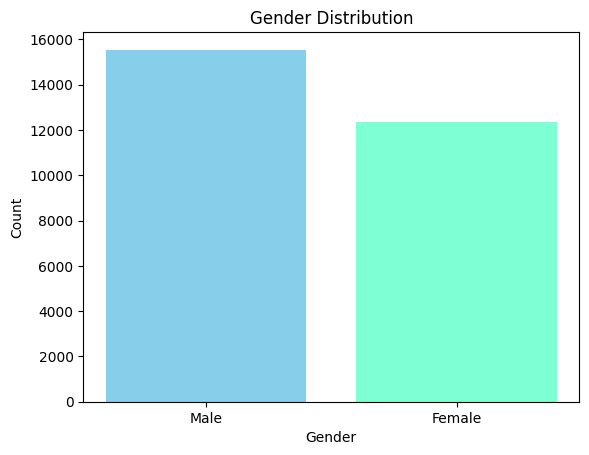

In [ ]:
################## Gender Distibution ####################

male_count = (df['Gender'] == 'Male').sum()
female_count = (df['Gender'] == 'Female').sum()
gender=['Male','Female']
value = [male_count, female_count]

plt.bar(gender, value, color=['skyblue', 'aquamarine'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

1st analysis : we have more male students as compared to female student

In [ ]:
df['Degree'].value_counts() # different degree and count of students

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [ ]:
degree_stats = df.groupby('Degree').agg(
    Count=('Degree', 'count'),
    Average_Age=('Age', 'mean')
)
degree_stats # with average age

Count  Average_Age
Degree                      
B.Arch     1478    25.644114
B.Com      1506    26.189243
B.Ed       1867    27.994108
B.Pharm     810    27.259259
B.Tech     1152    27.085069
BA          600    26.023333
BBA         696    26.334770
BCA        1433    27.015352
BE          613    28.177814
BHM         925    26.618378
BSc         888    26.458333
Class 12   6080    20.132895
LLB         671    29.482861
LLM         482    29.663900
M.Com       734    26.679837
M.Ed        821    29.394641
M.Pharm     582    28.793814
M.Tech     1022    28.363992
MA          544    27.452206
MBA         562    27.432384
MBBS        696    27.833333
MCA        1044    26.569923
MD          572    29.868881
ME          185    29.286486
MHM         191    28.790576
MSc        1190    26.860504
Others       35    26.685714
PhD         522    29.155172

In [ ]:
df['Profession'].value_counts() # no of count of students in different profession

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [ ]:
df.describe().T # getting some statistical data on the dataset ( numerical fetures only )

count          mean           std   min       25%  \
id                  27901.0  70442.149421  40641.175216   2.0  35039.00   
Age                 27901.0     25.822300      4.905687  18.0     21.00   
Academic Pressure   27901.0      3.141214      1.381465   0.0      2.00   
Work Pressure       27901.0      0.000430      0.043992   0.0      0.00   
CGPA                27901.0      7.656104      1.470707   0.0      6.29   
Study Satisfaction  27901.0      2.943837      1.361148   0.0      2.00   
Job Satisfaction    27901.0      0.000681      0.044394   0.0      0.00   
Work/Study Hours    27901.0      7.156984      3.707642   0.0      4.00   
Financial Stress    27901.0      3.140067      1.437399   1.0      2.00   
Depression          27901.0      0.585499      0.492645   0.0      0.00   

                         50%        75%       max  
id                  70684.00  105818.00  140699.0  
Age                    25.00      30.00      59.0  
Academic Pressure       3.00       4.00       5.0  
Work Pressure           0.00       0.00       5.0  
CGPA                    7.77       8.92      10.0  
Study Satisfaction      3.00       4.00       5.0  
Job Satisfaction        0.00       0.00       4.0  
Work/Study Hours        8.00      10.00      12.0  
Financial Stress        3.00       4.00       5.0  
Depression              1.00       1.00       1.0

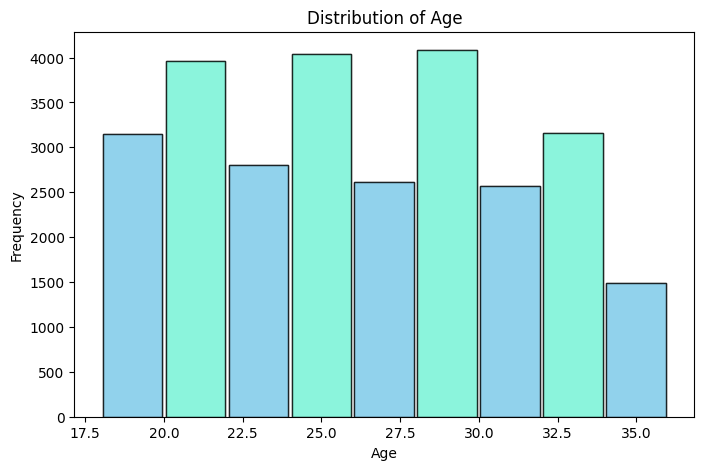

In [ ]:
# distribution of age and their frequency

plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=[18,20,22,24,26,28,30,32,34,36], color='skyblue', edgecolor='black', alpha=0.7,rwidth=0.95)


bins = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36]

# Create histogram
n, bins, patches = plt.hist(df['Age'], bins=bins, edgecolor='black', alpha=0.7, rwidth=0.95)

# Assign alternating colors
colors = ['skyblue', 'aquamarine']
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % 2])

# Labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()


9115 Male Students

7221 Female Students

df_depressed

In [ ]:
df_depressed = df[df['Depression'] == 1] # getting the data of students who are depressed

In [ ]:
df_depressed['Gender'].value_counts() # analysis of depressed students

Gender
Male      9115
Female    7221
Name: count, dtype: int64

In [ ]:
df_depressed['Age'].mean() # average age of depressed students

24.88773261508325

In [ ]:
df_depressed = df[df['Depression'] == 1] # percentage of depressed gender
gender_percentage = (df_depressed['Gender'].value_counts(normalize=True) * 100)
print(gender_percentage)

Gender
Male      55.797013
Female    44.202987
Name: proportion, dtype: float64


In [ ]:
df['Sleep Duration'].value_counts() # sleep analysis

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

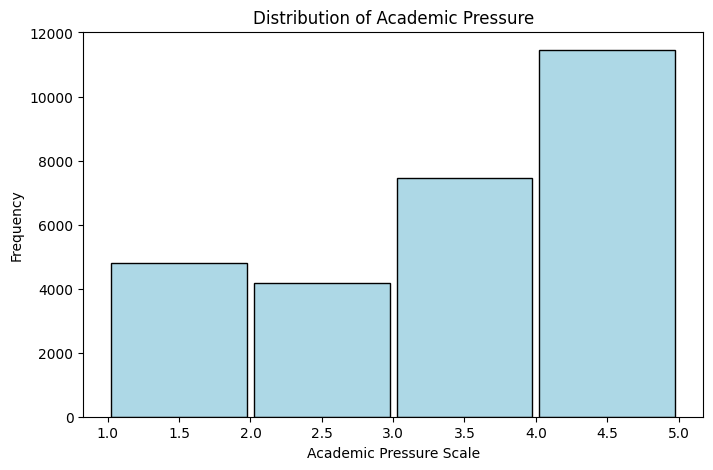

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Creating histogram with a light color
plt.hist(df['Academic Pressure'], bins=[1, 2, 3, 4, 5], color='lightblue', edgecolor='black', rwidth=0.95)

# Labels and title
plt.xlabel('Academic Pressure Scale')
plt.ylabel('Frequency')
plt.title('Distribution of Academic Pressure')

plt.show()


In [ ]:
# checking for connection between depression with sleep Duration
grouped_df = df.groupby('Sleep Duration')['Depression'].mean().reset_index().sort_values(by='Depression',ascending=False)
grouped_df

Sleep Duration  Depression
2  Less than 5 hours    0.645126
1          7-8 hours    0.595018
0          5-6 hours    0.568818
3  More than 8 hours    0.509265
4             Others    0.500000

target distribution

/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_2830/591998118.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Depression'], palette=['lightcoral', 'lightblue'])


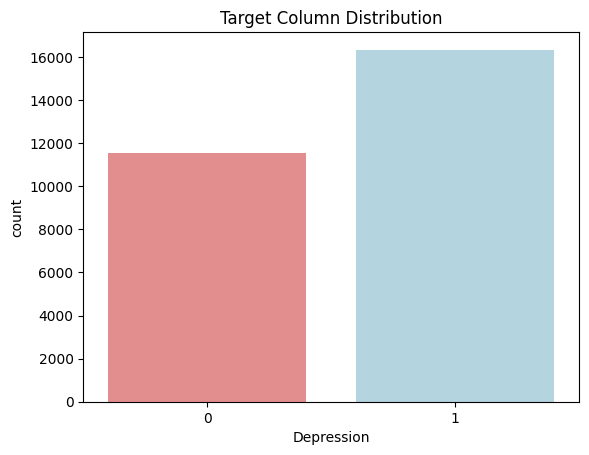

Depression
1    58.549873
0    41.450127
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x=df['Depression'], palette=['lightcoral', 'lightblue'])
plt.title("Target Column Distribution")
plt.show()


print((df['Depression'].value_counts(normalize=True))*100)  # Percentage


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
categorical_df = df.select_dtypes(include=['object', 'category'])
 # 8 fetures are in categorical format
categorical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Gender                                 27901 non-null  object
 1   City                                   27901 non-null  object
 2   Profession                             27901 non-null  object
 3   Sleep Duration                         27901 non-null  object
 4   Dietary Habits                         27901 non-null  object
 5   Degree                                 27901 non-null  object
 6   Have you ever had suicidal thoughts ?  27901 non-null  object
 7   Family History of Mental Illness       27901 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


# dropping unnecessary columns


In [ ]:
df = df.drop(['Work Pressure','Job Satisfaction','Profession',"id"],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Academic Pressure                      27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Sleep Duration                         27901 non-null  object 
 7   Dietary Habits                         27901 non-null  object 
 8   Degree                                 27901 non-null  object 
 9   Have you ever had suicidal thoughts ?  27901 non-null  object 
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

In [ ]:
df['City'].value_counts() # checking no of cities

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

# removing cities with less than 400 count



In [ ]:

cities_to_remove = df['City'].value_counts()[df['City'].value_counts() < 400]
df = df[~df['City'].isin(cities_to_remove.index)]
df['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

# Converting Categorical data into Numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encode City Column
df['City'] = le.fit_transform(df['City'])
# Display Mapping
city_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("City Encoding Mapping:\n", city_mapping)

df["City"].nunique() # count total no of city

City Encoding Mapping:
 {'Agra': 0, 'Ahmedabad': 1, 'Bangalore': 2, 'Bhopal': 3, 'Chennai': 4, 'Delhi': 5, 'Faridabad': 6, 'Ghaziabad': 7, 'Hyderabad': 8, 'Indore': 9, 'Jaipur': 10, 'Kalyan': 11, 'Kanpur': 12, 'Kolkata': 13, 'Lucknow': 14, 'Ludhiana': 15, 'Meerut': 16, 'Mumbai': 17, 'Nagpur': 18, 'Nashik': 19, 'Patna': 20, 'Pune': 21, 'Rajkot': 22, 'Srinagar': 23, 'Surat': 24, 'Thane': 25, 'Vadodara': 26, 'Varanasi': 27, 'Vasai-Virar': 28, 'Visakhapatnam': 29}


30

In [ ]:
# covering gender  Male → 1, Female → 0

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [ ]:
# diet mapping

diet_mapping = {
                'Healthy': 2,
                'Moderate': 1,
                'Unhealthy': 0,
                'Others' : 3 }

df['Dietary Habits'] = df['Dietary Habits'].map(diet_mapping)


In [ ]:
sleep_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others': 4  # If "Others" is a mix, assign the highest or median
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

In [ ]:
# mapping two more fetures

df['Have you ever had suicidal thoughts ?'] = df[
    'Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

df['Family History of Mental Illness'] = df[
    'Family History of Mental Illness'].map({'Yes': 1, 'No': 0})



In [ ]:
# grouping degress in 4 varriable

df['New_Degree'] = 'Others'  # Default category

df.loc[df['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True, na=False), 'New_Degree'] = 'Graduated'
df.loc[df['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True, na=False), 'New_Degree'] = 'Post Graduated'
df.loc[df['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'

# Value Counts
print(df['New_Degree'].value_counts())



New_Degree
Graduated           12627
Post Graduated       7159
Higher Secondary     6075
Others               2014
Name: count, dtype: int64


In [ ]:
# encoding degree

df.loc[df['New_Degree'] == 'Graduated', 'New_Degree'] = 0
df.loc[df['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
df.loc[df['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
df.loc[df['New_Degree'] == 'Others', 'New_Degree'] = 3
df['New_Degree'].value_counts()

New_Degree
0    12627
1     7159
2     6075
3     2014
Name: count, dtype: int64

In [ ]:
# dropping original degree column

df.drop('Degree', axis=1, inplace=True)
df["New_Degree" ]= df["New_Degree"].astype(int)


In [ ]:
# taking students age till 30 yrs
df = df.loc[df['Age'] <= 30]
df['Age'].value_counts()

Age
24.0    2258
20.0    2235
28.0    2132
29.0    1943
25.0    1783
21.0    1721
23.0    1644
18.0    1586
19.0    1560
27.0    1460
22.0    1160
26.0    1154
30.0    1144
Name: count, dtype: int64

In [ ]:
df.info()
# Sucessfully converted Categorical data to numerical data

<class 'pandas.core.frame.DataFrame'>
Index: 21780 entries, 1 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 21780 non-null  int64  
 1   Age                                    21780 non-null  float64
 2   City                                   21780 non-null  int64  
 3   Academic Pressure                      21780 non-null  float64
 4   CGPA                                   21780 non-null  float64
 5   Study Satisfaction                     21780 non-null  float64
 6   Sleep Duration                         21780 non-null  int64  
 7   Dietary Habits                         21780 non-null  int64  
 8   Have you ever had suicidal thoughts ?  21780 non-null  int64  
 9   Work/Study Hours                       21780 non-null  float64
 10  Financial Stress                       21780 non-null  float64
 11  Family 

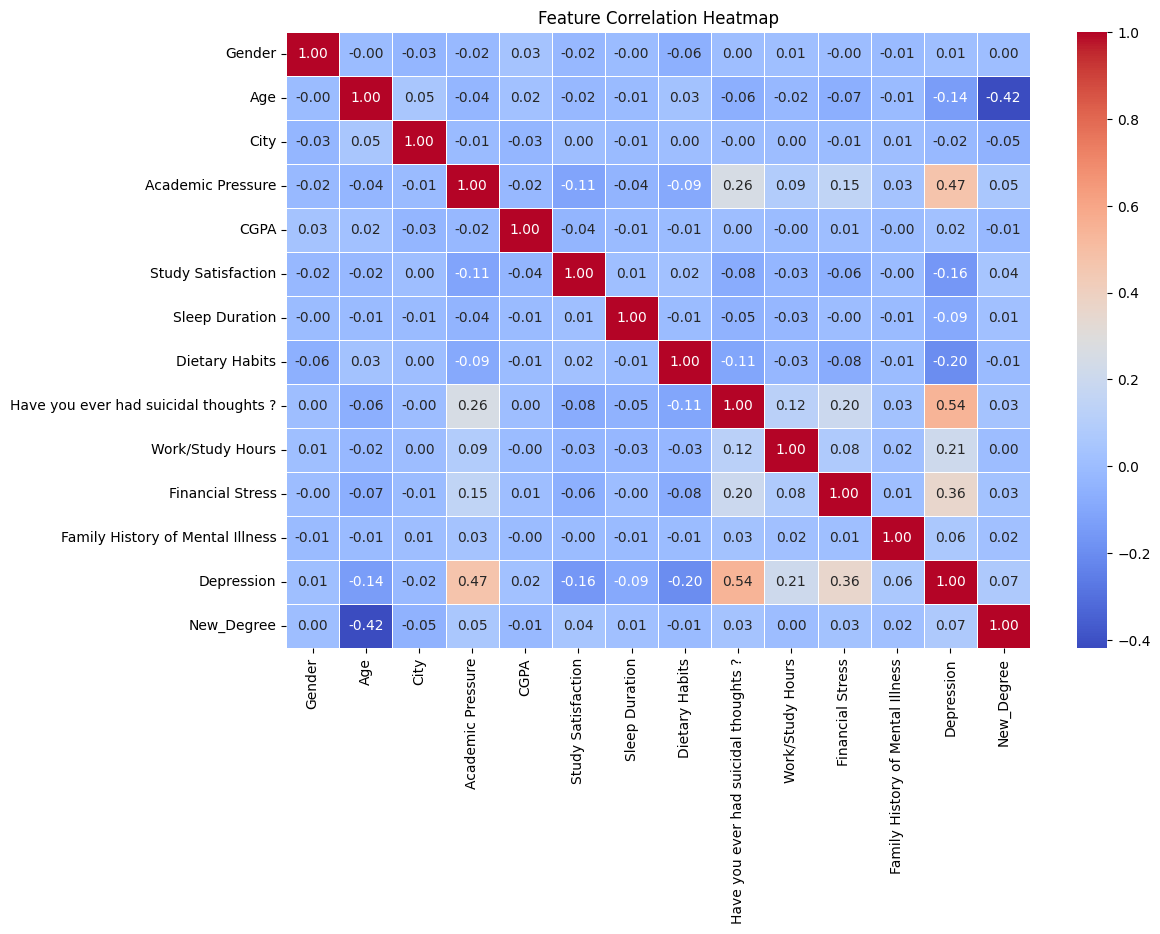

In [ ]:
# plotting heatmap

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Mean Squared Error: 1.933256729165209e-06


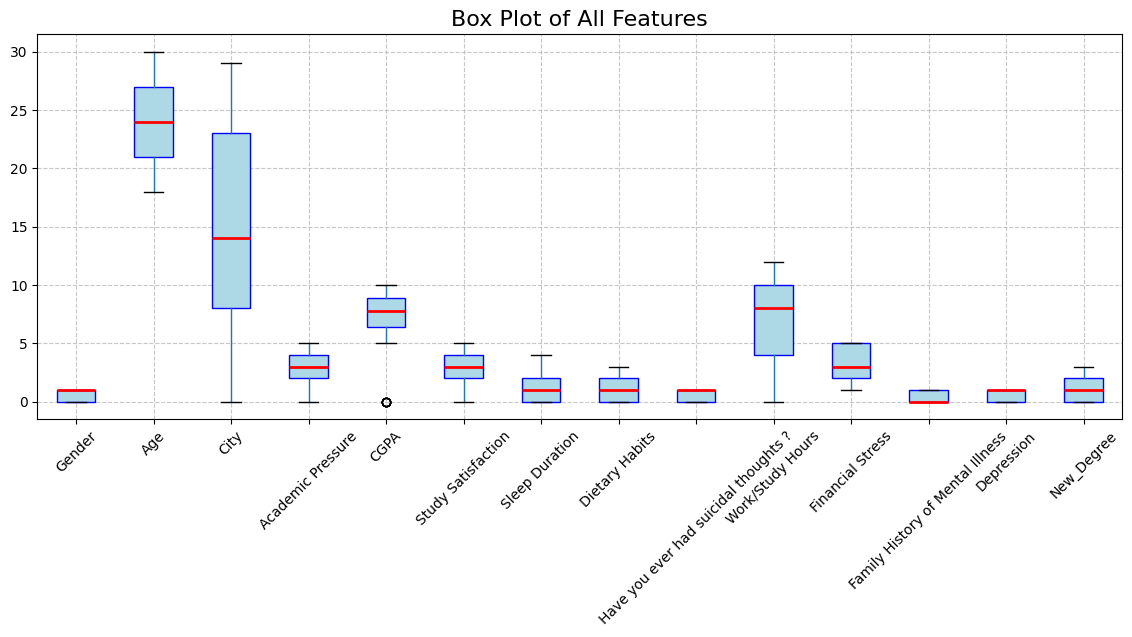

In [ ]:
plt.figure(figsize=(14, 5))
df.boxplot(patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red', linewidth=2))
plt.xticks(rotation=45)
plt.title("Box Plot of All Features", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

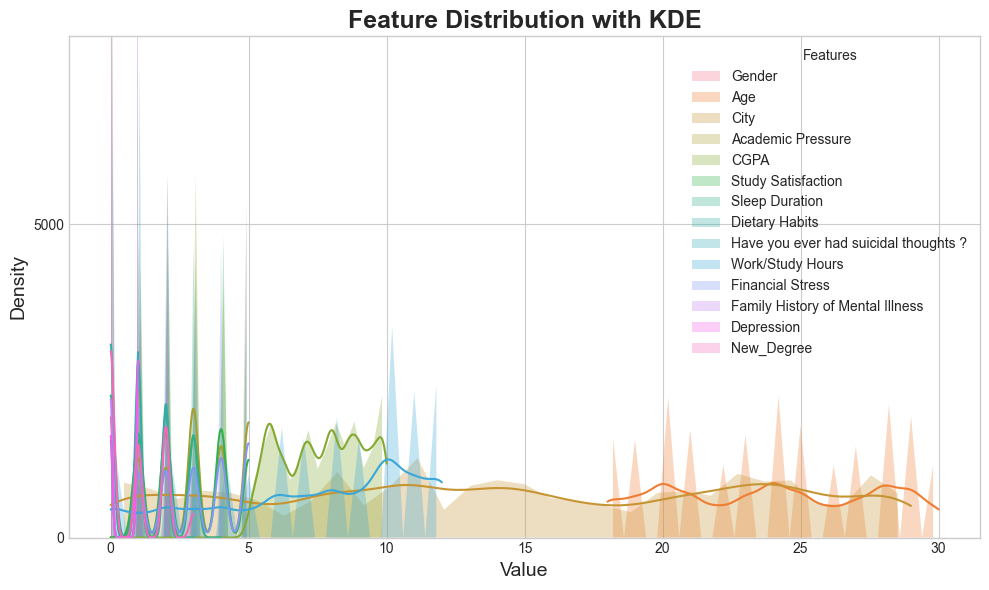

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Needed for defining y-tick range

plt.style.use("seaborn-v0_8-whitegrid")

# Set figure size
plt.figure(figsize=(10, 6))

# Selecting numerical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
colors = sns.color_palette("husl", len(num_cols))  # Generate distinct colors for each feature

# Plot each feature on the same axis
for col, color in zip(num_cols, colors):
    sns.histplot(df[col], bins=30, kde=True, color=color, edgecolor=None, alpha=0.3, element="poly", label=col)

# Set Y-axis limits and intervals
plt.ylim(0, 8000)  # Max limit at 8000
plt.yticks(np.arange(0, 8001, 5000))  # Intervals at 5000

# Title and labels
plt.title("Feature Distribution with KDE", fontsize=18, fontweight='bold')
plt.xlabel("Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Features")

plt.tight_layout()
plt.show()


In [ ]:
df.describe().T

count       mean       std   min  \
Gender                                 21780.0   0.552847  0.497211   0.0   
Age                                    21780.0  23.917126  3.692142  18.0   
City                                   21780.0  14.627365  8.719609   0.0   
Academic Pressure                      21780.0   3.193205  1.378586   0.0   
CGPA                                   21780.0   7.662443  1.460965   0.0   
Study Satisfaction                     21780.0   2.924334  1.366280   0.0   
Sleep Duration                         21780.0   1.398163  1.129055   0.0   
Dietary Habits                         21780.0   0.882553  0.798880   0.0   
Have you ever had suicidal thoughts ?  21780.0   0.657622  0.474516   0.0   
Work/Study Hours                       21780.0   7.202847  3.690838   0.0   
Financial Stress                       21780.0   3.196465  1.428112   1.0   
Family History of Mental Illness       21780.0   0.484114  0.499759   0.0   
Depression                             21780.0   0.634894  0.481471   0.0   
New_Degree                             21780.0   0.931864  0.970450   0.0   

                                          25%    50%    75%   max  
Gender                                  0.000   1.00   1.00   1.0  
Age                                    21.000  24.00  27.00  30.0  
City                                    8.000  14.00  23.00  29.0  
Academic Pressure                       2.000   3.00   4.00   5.0  
CGPA                                    6.345   7.77   8.91  10.0  
Study Satisfaction                      2.000   3.00   4.00   5.0  
Sleep Duration                          0.000   1.00   2.00   4.0  
Dietary Habits                          0.000   1.00   2.00   3.0  
Have you ever had suicidal thoughts ?   0.000   1.00   1.00   1.0  
Work/Study Hours                        4.000   8.00  10.00  12.0  
Financial Stress                        2.000   3.00   5.00   5.0  
Family History of Mental Illness        0.000   0.00   1.00   1.0  
Depression                              0.000   1.00   1.00   1.0  
New_Degree                              0.000   1.00   2.00   3.0

# training models without balancing the dataset

In [ ]:
#importing all the model classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier)
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report, roc_curve, auc, average_precision_score, cohen_kappa_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
models = []
models.append(['SVM',SVC(random_state=0, probability=True)])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier(n_neighbors=3)])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])

models.append(['XGBClassifier',XGBClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier(random_state=0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['LGBMClassifier', LGBMClassifier(random_state=0)])
models.append(['CatBoostClassifier', CatBoostClassifier()])

In [ ]:
def print_roc_curve(curve_list):

  # Plot ROC curve
  print()
  plt.figure(figsize=(10,7))
  plt.plot([0, 1], [0, 1], 'k--')

  for name, fpr, tpr, roc_auc in curve_list:
    plt.plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the investigated models')
  plt.legend(loc='best')
  plt.show()

def run_model(X_train, y_train, X_test, y_test, model_lst, kcv):
  lst_1 = []
  roc_auc_list = []

  for m in range(len(model_lst)):
      lst_2 = []
      name = model_lst[m][0]
      model = model_lst[m][1]
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)

      # for ROC-AUC Curve
      y_pred_prob = model.predict_proba(X_test)[:,-1]
      fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr, tpr)
      roc_auc_list.append([name, fpr, tpr, roc_auc])

      # for Confusion Matrix
      plt.figure(figsize=(7,5))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(name)
      plt.xlabel('Predict')
      plt.ylabel('Truth')
      plt.show()

      # k-fold Validation
      accuracies = cross_val_score(estimator= model, X = X_train, y = y_train, cv=kcv)
      acc_score = accuracy_score(y_test,y_pred)
      roc = roc_auc_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      cohen_score = cohen_kappa_score(y_test, y_pred)

      print(name,':')
      print(cm)
      print('Accuracy Score: ', acc_score)
      print('')
      print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
      print('')
      print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
      print('')
      print('ROC AUC Score: {:.2f} %'.format(roc))
      print('')
      print('Precision: {:.2f} %'.format(precision))
      print('')
      print('Recall: {:.2f} %'.format(recall))
      print('')
      print('F1 Score: {:.2f} %'.format(f1))
      print('')
      print('Cohen Score: {:.2f} %'.format(cohen_score))
      print('-'*40)
      print('')

      lst_2.append(name)
      lst_2.append(acc_score*100)
      lst_2.append(accuracies.mean()*100)
      lst_2.append(accuracies.std()*100)
      lst_2.append(roc)
      lst_2.append(precision)
      lst_2.append(recall)
      lst_2.append(f1)
      lst_2.append(cohen_score)
      lst_1.append(lst_2)

  print_roc_curve(roc_auc_list)

  df1 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])
  df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],inplace=True,ascending=False)

  return df1

In [ ]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Gender, Age, City, Academic Pressure, CGPA, Study Satisfaction, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression, New_Degree]
Index: []

### training code


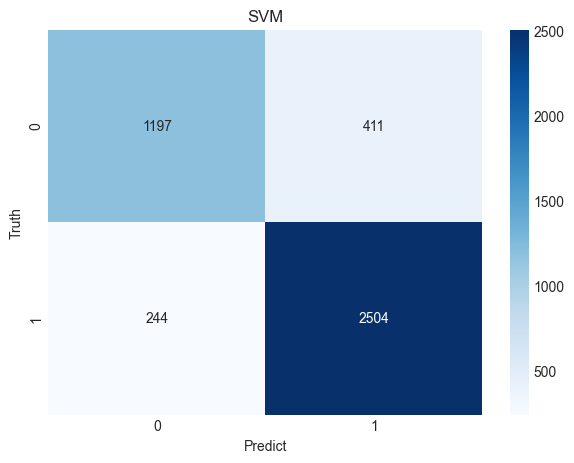

SVM :
[[1197  411]
 [ 244 2504]]
Accuracy Score:  0.8496326905417815

K-Fold Validation Mean Accuracy: 84.62 %

Standard Deviation: 0.88 %

ROC AUC Score: 0.83 %

Precision: 0.86 %

Recall: 0.91 %

F1 Score: 0.88 %

Cohen Score: 0.67 %
----------------------------------------



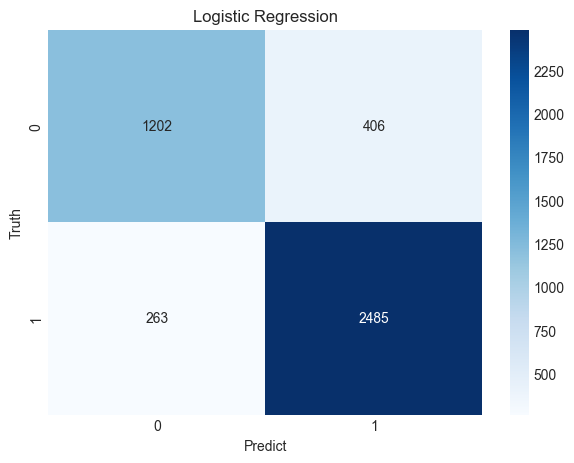

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression :
[[1202  406]
 [ 263 2485]]
Accuracy Score:  0.8464187327823691

K-Fold Validation Mean Accuracy: 84.71 %

Standard Deviation: 0.70 %

ROC AUC Score: 0.83 %

Precision: 0.86 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.66 %
----------------------------------------



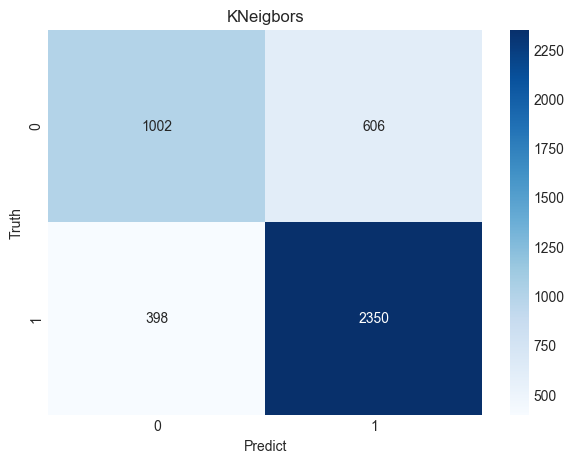

KNeigbors :
[[1002  606]
 [ 398 2350]]
Accuracy Score:  0.7695133149678605

K-Fold Validation Mean Accuracy: 76.02 %

Standard Deviation: 0.75 %

ROC AUC Score: 0.74 %

Precision: 0.79 %

Recall: 0.86 %

F1 Score: 0.82 %

Cohen Score: 0.49 %
----------------------------------------



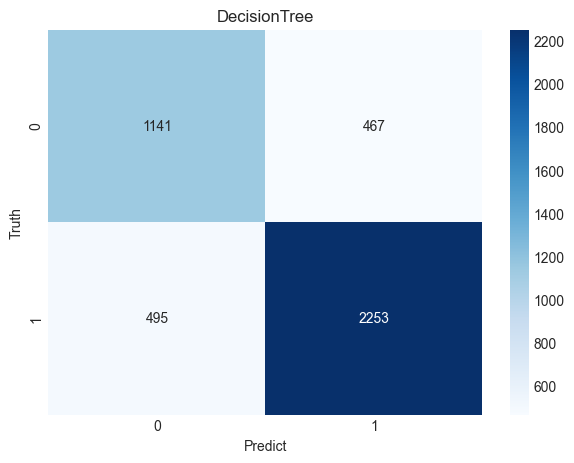

DecisionTree :
[[1141  467]
 [ 495 2253]]
Accuracy Score:  0.7791551882460973

K-Fold Validation Mean Accuracy: 76.34 %

Standard Deviation: 0.97 %

ROC AUC Score: 0.76 %

Precision: 0.83 %

Recall: 0.82 %

F1 Score: 0.82 %

Cohen Score: 0.53 %
----------------------------------------



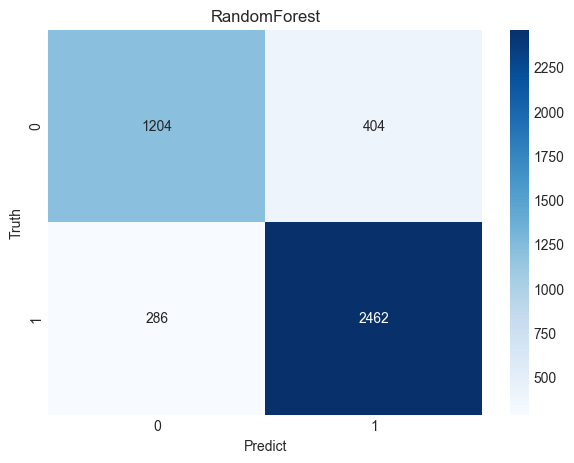

RandomForest :
[[1204  404]
 [ 286 2462]]
Accuracy Score:  0.8415977961432507

K-Fold Validation Mean Accuracy: 84.22 %

Standard Deviation: 0.64 %

ROC AUC Score: 0.82 %

Precision: 0.86 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.65 %
----------------------------------------



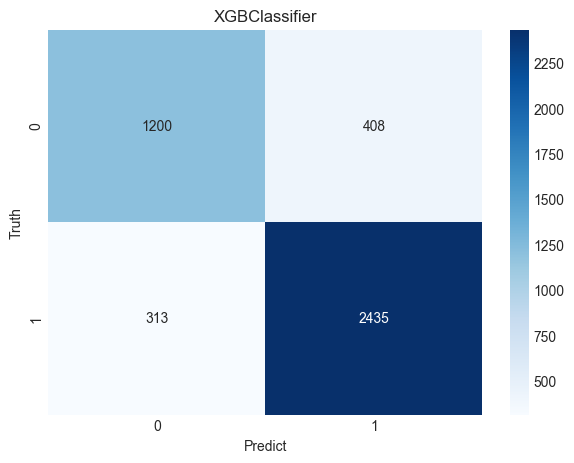

XGBClassifier :
[[1200  408]
 [ 313 2435]]
Accuracy Score:  0.8344811753902663

K-Fold Validation Mean Accuracy: 83.58 %

Standard Deviation: 0.61 %

ROC AUC Score: 0.82 %

Precision: 0.86 %

Recall: 0.89 %

F1 Score: 0.87 %

Cohen Score: 0.64 %
----------------------------------------



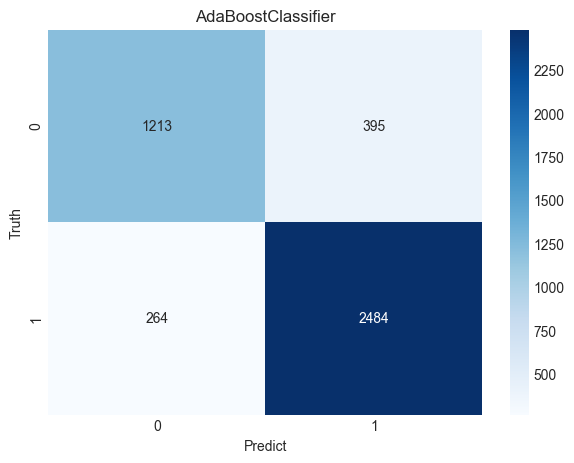

AdaBoostClassifier :
[[1213  395]
 [ 264 2484]]
Accuracy Score:  0.8487144168962351

K-Fold Validation Mean Accuracy: 84.62 %

Standard Deviation: 0.58 %

ROC AUC Score: 0.83 %

Precision: 0.86 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.67 %
----------------------------------------



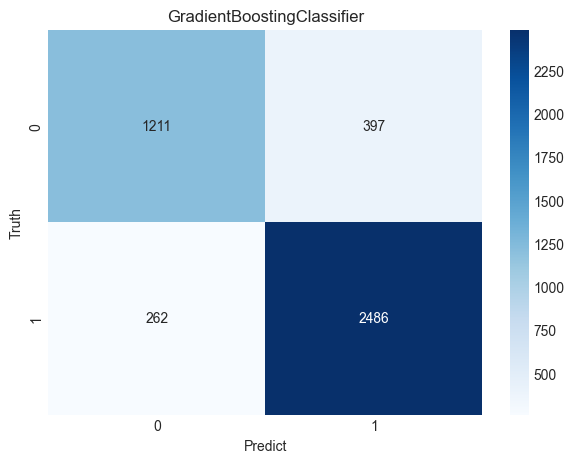

GradientBoostingClassifier :
[[1211  397]
 [ 262 2486]]
Accuracy Score:  0.8487144168962351

K-Fold Validation Mean Accuracy: 84.73 %

Standard Deviation: 0.60 %

ROC AUC Score: 0.83 %

Precision: 0.86 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.67 %
----------------------------------------



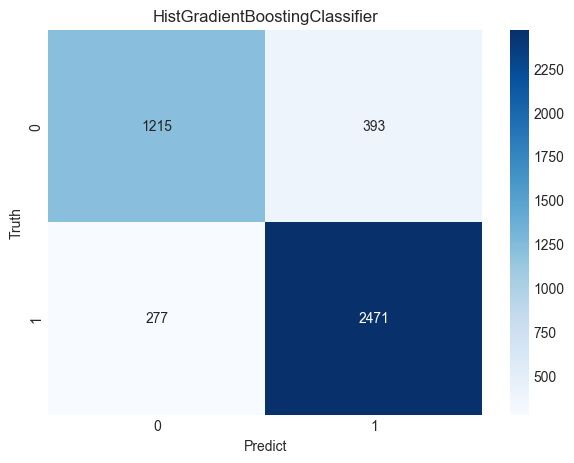

HistGradientBoostingClassifier :
[[1215  393]
 [ 277 2471]]
Accuracy Score:  0.8461891643709826

K-Fold Validation Mean Accuracy: 84.66 %

Standard Deviation: 0.54 %

ROC AUC Score: 0.83 %

Precision: 0.86 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.66 %
----------------------------------------

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11080, number of negative: 6344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 17424, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635904 -> initscore=0.557632
[LightGBM] [Info] Start training from score 0.557632


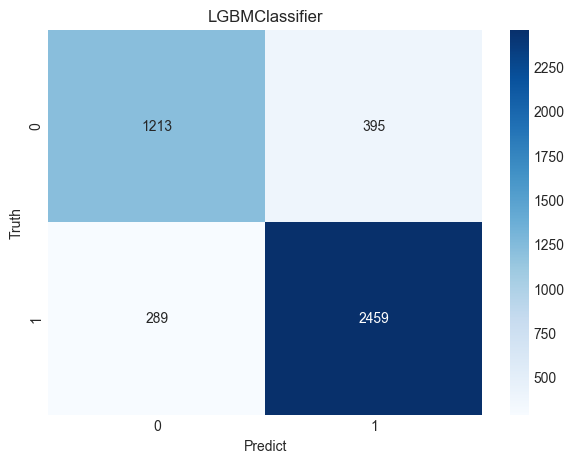

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9972, number of negative: 5709
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 15681, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635929 -> initscore=0.557737
[LightGBM] [Info] Start training from score 0.557737
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9972, number of negative: 5709
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 15681, number of used feature

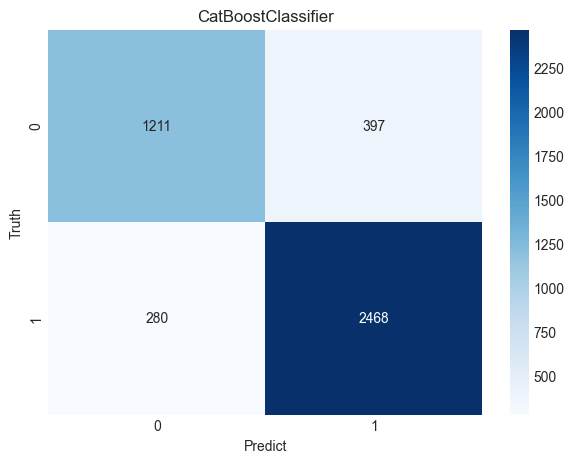

Learning rate set to 0.03337
0:	learn: 0.6667705	total: 2.75ms	remaining: 2.75s
1:	learn: 0.6425040	total: 5.32ms	remaining: 2.65s
2:	learn: 0.6210800	total: 7.98ms	remaining: 2.65s
3:	learn: 0.6017575	total: 10.8ms	remaining: 2.68s
4:	learn: 0.5832871	total: 14.1ms	remaining: 2.8s
5:	learn: 0.5662849	total: 17ms	remaining: 2.82s
6:	learn: 0.5507073	total: 19.8ms	remaining: 2.81s
7:	learn: 0.5361411	total: 22.7ms	remaining: 2.82s
8:	learn: 0.5235174	total: 25.4ms	remaining: 2.8s
9:	learn: 0.5121013	total: 27.9ms	remaining: 2.76s
10:	learn: 0.5013046	total: 30.4ms	remaining: 2.73s
11:	learn: 0.4920726	total: 33.1ms	remaining: 2.72s
12:	learn: 0.4835309	total: 35.6ms	remaining: 2.7s
13:	learn: 0.4750899	total: 38.6ms	remaining: 2.72s
14:	learn: 0.4668858	total: 41.4ms	remaining: 2.72s
15:	learn: 0.4598027	total: 43.9ms	remaining: 2.7s
16:	learn: 0.4531569	total: 46.2ms	remaining: 2.67s
17:	learn: 0.4463422	total: 48.7ms	remaining: 2.65s
18:	learn: 0.4404355	total: 51.2ms	remaining: 2.65s

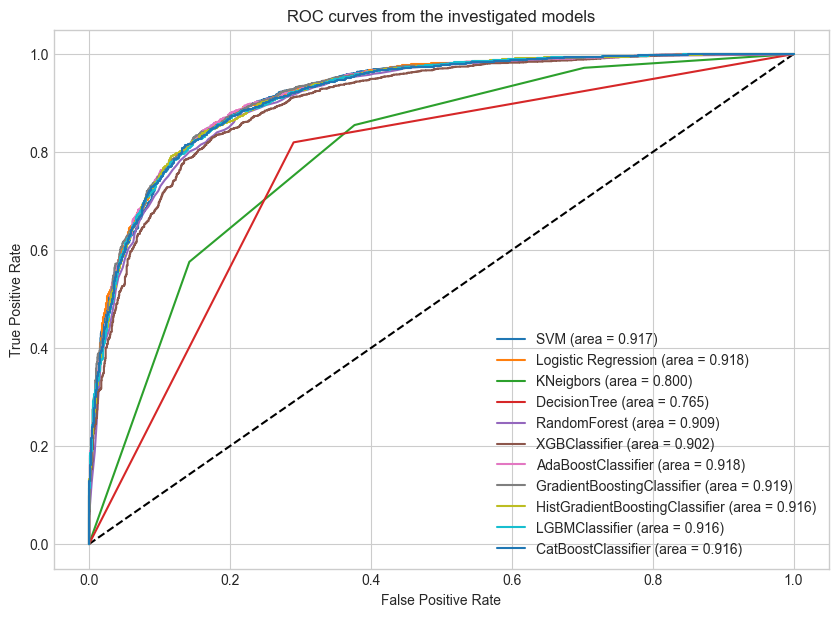

In [ ]:
X = df.drop(columns=['Depression'])
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
test_imbalanced = run_model(X_train, y_train, X_test, y_test, models, 10)

In [ ]:
test_imbalanced

Model   Accuracy  K-Fold Mean Accuracy  \
0                              SVM  84.963269             84.624804   
7       GradientBoostingClassifier  84.871442             84.733785   
6               AdaBoostClassifier  84.871442             84.624774   
1              Logistic Regression  84.641873             84.710843   
8   HistGradientBoostingClassifier  84.618916             84.659158   
10              CatBoostClassifier  84.458219             84.509937   
9                   LGBMClassifier  84.297521             84.418086   
4                     RandomForest  84.159780             84.217233   
5                    XGBClassifier  83.448118             83.580156   
3                     DecisionTree  77.915519             76.342944   
2                        KNeigbors  76.951331             76.015879   

    Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  Cohen-Kappa Score  
0        0.882911  0.827806   0.859005  0.911208  0.884337           0.670045  
7        0.599686  0.828884   0.862296  0.904658  0.882969           0.669425  
6        0.580690  0.829142   0.862800  0.903930  0.882886           0.669598  
1        0.703678  0.825903   0.859564  0.904294  0.881362           0.664056  
8        0.540092  0.827398   0.862779  0.899199  0.880613           0.664743  
10       0.537846  0.825609   0.861431  0.898108  0.879387           0.661196  
9        0.526717  0.824593   0.861598  0.894833  0.877901           0.658186  
4        0.635930  0.822340   0.859037  0.895924  0.877093           0.654645  
5        0.610308  0.816184   0.856490  0.886099  0.871043           0.640213  
3        0.967161  0.764723   0.828309  0.819869  0.824067           0.527541  
2        0.747057  0.739151   0.794993  0.855167  0.823983           0.491489

## balancing the target values

In [ ]:
df["Depression"].value_counts()

Depression
1    13828
0     7952
Name: count, dtype: int64

/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_2830/3675483729.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Depression'], palette=['lightcoral', 'lightblue'])


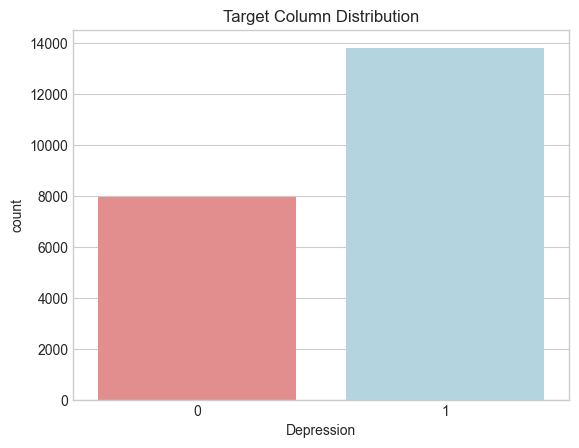

In [ ]:
sns.countplot(x=df['Depression'], palette=['lightcoral', 'lightblue'])
plt.title("Target Column Distribution")
plt.show()


### Applying Smote


In [ ]:
X = df.drop(columns=['Depression'])
y = df['Depression']

# Apply SMOTE for oversampling

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['Depression'] = y_smote
print("Updated DataFrame shape:", df_smote.shape)
print("\nBefore Oversampling:", Counter(y))
print("After Oversampling:", Counter(y_smote))
print("\n")
print(df_smote['Depression'].value_counts())



Updated DataFrame shape: (27656, 14)

Before Oversampling: Counter({1: 13828, 0: 7952})
After Oversampling: Counter({0: 13828, 1: 13828})


Depression
0    13828
1    13828
Name: count, dtype: int64


/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_2830/2697415120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_smote['Depression'], palette=['lightcoral', 'lightblue'])


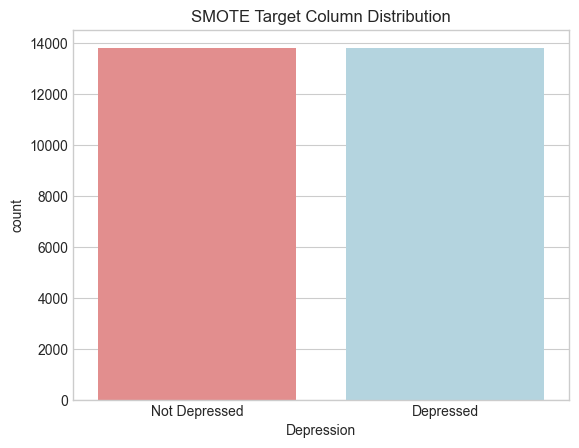

In [ ]:
sns.countplot(x=df_smote['Depression'], palette=['lightcoral', 'lightblue'])
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.title("SMOTE Target Column Distribution")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21780 entries, 1 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 21780 non-null  int64  
 1   Age                                    21780 non-null  float64
 2   City                                   21780 non-null  int64  
 3   Academic Pressure                      21780 non-null  float64
 4   CGPA                                   21780 non-null  float64
 5   Study Satisfaction                     21780 non-null  float64
 6   Sleep Duration                         21780 non-null  int64  
 7   Dietary Habits                         21780 non-null  int64  
 8   Have you ever had suicidal thoughts ?  21780 non-null  int64  
 9   Work/Study Hours                       21780 non-null  float64
 10  Financial Stress                       21780 non-null  float64
 11  Family 

In [ ]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27656 non-null  int64  
 1   Age                                    27656 non-null  float64
 2   City                                   27656 non-null  int64  
 3   Academic Pressure                      27656 non-null  float64
 4   CGPA                                   27656 non-null  float64
 5   Study Satisfaction                     27656 non-null  float64
 6   Sleep Duration                         27656 non-null  int64  
 7   Dietary Habits                         27656 non-null  int64  
 8   Have you ever had suicidal thoughts ?  27656 non-null  int64  
 9   Work/Study Hours                       27656 non-null  float64
 10  Financial Stress                       27656 non-null  float64
 11  Fa

## training model after applying smote

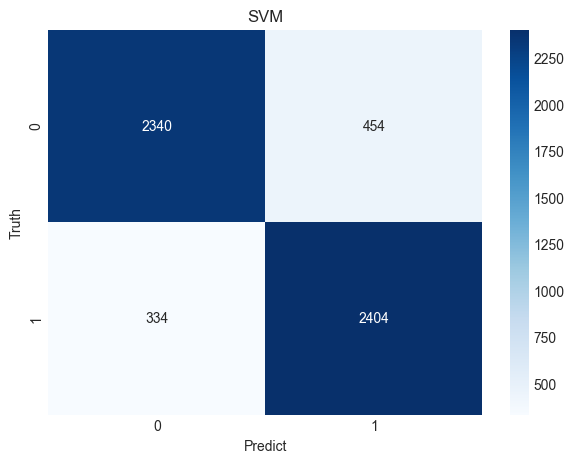

KeyboardInterrupt: 

In [ ]:
X = df_smote.drop(columns=['Depression'])
y = df_smote['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
test_smote = run_model(X_train, y_train, X_test, y_test, models, 10)


In [ ]:
test_smote

Model   Accuracy  K-Fold Mean Accuracy  \
9                   LGBMClassifier  87.924801             87.800581   
10              CatBoostClassifier  87.816341             87.868354   
4                     RandomForest  87.762111             87.429900   
8   HistGradientBoostingClassifier  87.671728             87.637844   
7       GradientBoostingClassifier  87.509038             87.506797   
5                    XGBClassifier  87.436732             87.190357   
6               AdaBoostClassifier  86.840202             86.797136   
1              Logistic Regression  85.827910             85.816309   
0                              SVM  85.755604             85.730416   
2                        KNeigbors  82.357195             81.807091   
3                     DecisionTree  81.760665             81.477101   

    Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  Cohen-Kappa Score  
9        0.339598  0.879474   0.860879  0.901753  0.880842           0.758586  
10       0.436176  0.878444   0.856108  0.906136  0.880412           0.756444  
4        0.569861  0.877757   0.865555  0.891161  0.878172           0.755290  
8        0.446181  0.876924   0.859692  0.897370  0.878127           0.753518  
7        0.447935  0.875306   0.857492  0.896640  0.876629           0.750269  
5        0.395414  0.874598   0.855799  0.897370  0.876092           0.748831  
6        0.405202  0.868572   0.854123  0.885318  0.869440           0.736873  
1        0.398070  0.858473   0.842567  0.877648  0.859750           0.716647  
0        0.420073  0.857761   0.841148  0.878013  0.859185           0.715208  
2        0.710901  0.823038   0.858713  0.770270  0.812091           0.646743  
3        0.662862  0.817641   0.812432  0.821037  0.816712           0.635215

### Applying Smote-Tomek


In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

X = df.drop(columns=['Depression'])
y = df['Depression']
smotetomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X, y)
df_smotetomek = pd.DataFrame(X_smotetomek, columns=X.columns)
df_smotetomek['Depression'] = y_smotetomek
print("Updated DataFrame shape:", df_smotetomek.shape)
print("\nBefore Resampling:", Counter(y))
print("After Resampling:", Counter(y_smotetomek))
print("\n")
print(df_smotetomek['Depression'].value_counts())

Updated DataFrame shape: (26692, 14)

Before Resampling: Counter({1: 13828, 0: 7952})
After Resampling: Counter({0: 13346, 1: 13346})


Depression
0    13346
1    13346
Name: count, dtype: int64


/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_7321/1891228407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_smotetomek['Depression'], palette=['#3498db', '#e74c3c'])


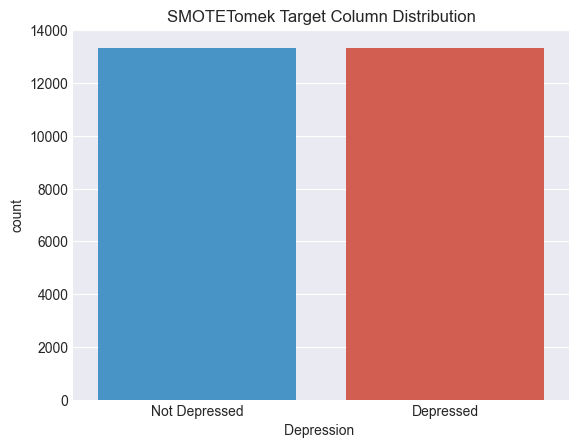

In [ ]:
sns.countplot(x=df_smotetomek['Depression'], palette=['#3498db', '#e74c3c'])
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.title("SMOTETomek Target Column Distribution")
plt.xlabel("Depression ")
plt.show()


#### training model on smotetomek


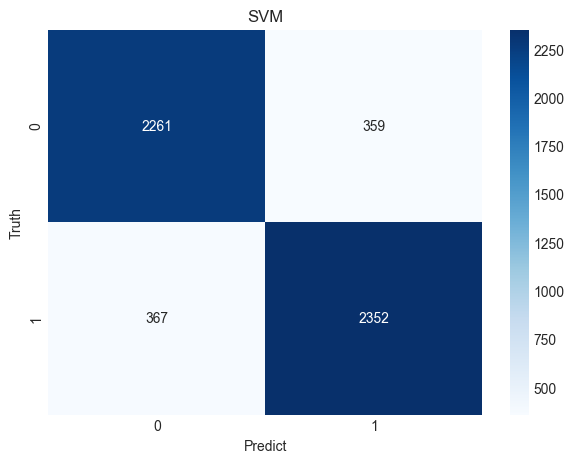

SVM :
[[2261  359]
 [ 367 2352]]
Accuracy Score:  0.8640194793032403

K-Fold Validation Mean Accuracy: 86.58 %

Standard Deviation: 0.84 %

ROC AUC Score: 0.86 %

Precision: 0.87 %

Recall: 0.87 %

F1 Score: 0.87 %

Cohen Score: 0.73 %
----------------------------------------



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


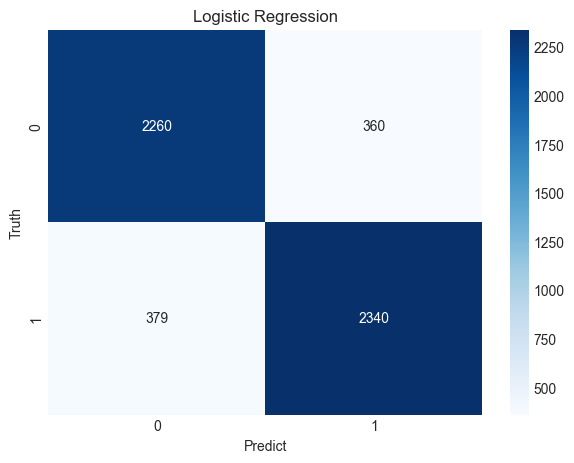

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression :
[[2260  360]
 [ 379 2340]]
Accuracy Score:  0.8615845663982019

K-Fold Validation Mean Accuracy: 86.76 %

Standard Deviation: 0.84 %

ROC AUC Score: 0.86 %

Precision: 0.87 %

Recall: 0.86 %

F1 Score: 0.86 %

Cohen Score: 0.72 %
----------------------------------------



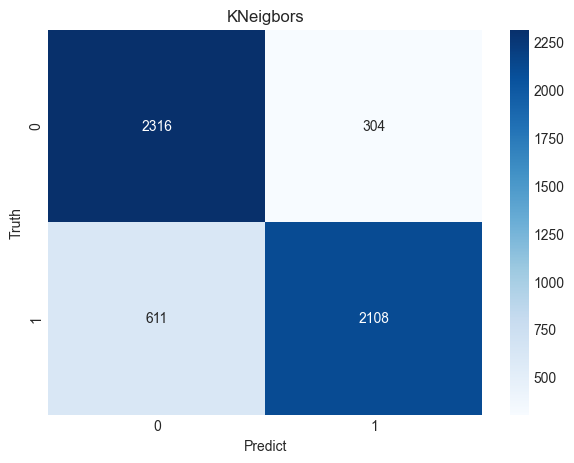

KNeigbors :
[[2316  304]
 [ 611 2108]]
Accuracy Score:  0.8286195916838359

K-Fold Validation Mean Accuracy: 83.72 %

Standard Deviation: 0.78 %

ROC AUC Score: 0.83 %

Precision: 0.87 %

Recall: 0.78 %

F1 Score: 0.82 %

Cohen Score: 0.66 %
----------------------------------------



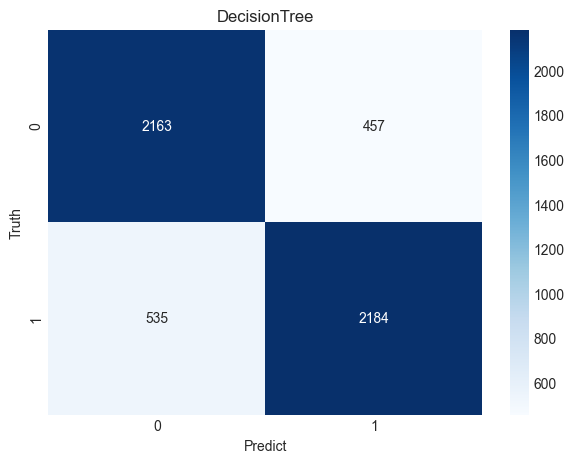

DecisionTree :
[[2163  457]
 [ 535 2184]]
Accuracy Score:  0.8141974152463008

K-Fold Validation Mean Accuracy: 82.50 %

Standard Deviation: 0.79 %

ROC AUC Score: 0.81 %

Precision: 0.83 %

Recall: 0.80 %

F1 Score: 0.81 %

Cohen Score: 0.63 %
----------------------------------------



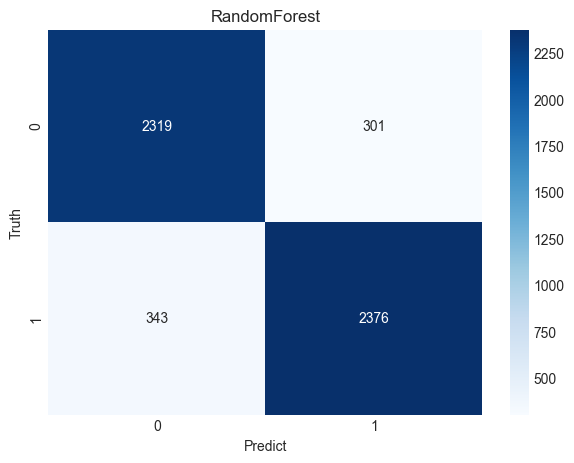

RandomForest :
[[2319  301]
 [ 343 2376]]
Accuracy Score:  0.8793781607042518

K-Fold Validation Mean Accuracy: 88.57 %

Standard Deviation: 0.77 %

ROC AUC Score: 0.88 %

Precision: 0.89 %

Recall: 0.87 %

F1 Score: 0.88 %

Cohen Score: 0.76 %
----------------------------------------



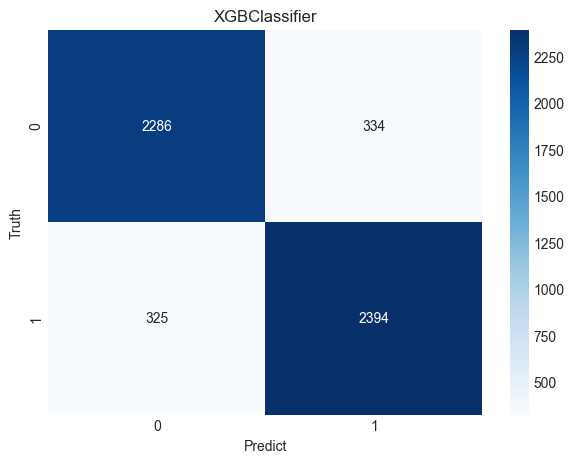

XGBClassifier :
[[2286  334]
 [ 325 2394]]
Accuracy Score:  0.8765686458138228

K-Fold Validation Mean Accuracy: 88.21 %

Standard Deviation: 0.86 %

ROC AUC Score: 0.88 %

Precision: 0.88 %

Recall: 0.88 %

F1 Score: 0.88 %

Cohen Score: 0.75 %
----------------------------------------



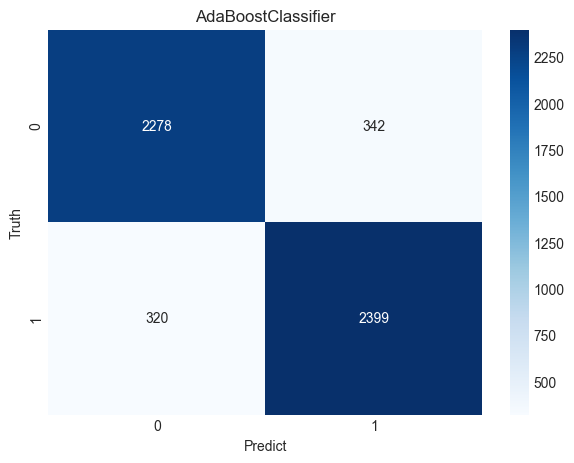

AdaBoostClassifier :
[[2278  342]
 [ 320 2399]]
Accuracy Score:  0.876006742835737

K-Fold Validation Mean Accuracy: 87.84 %

Standard Deviation: 0.65 %

ROC AUC Score: 0.88 %

Precision: 0.88 %

Recall: 0.88 %

F1 Score: 0.88 %

Cohen Score: 0.75 %
----------------------------------------



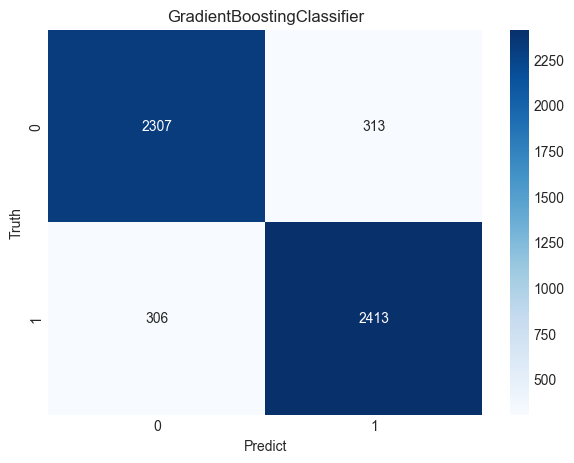

GradientBoostingClassifier :
[[2307  313]
 [ 306 2413]]
Accuracy Score:  0.8840606855216333

K-Fold Validation Mean Accuracy: 88.58 %

Standard Deviation: 0.66 %

ROC AUC Score: 0.88 %

Precision: 0.89 %

Recall: 0.89 %

F1 Score: 0.89 %

Cohen Score: 0.77 %
----------------------------------------



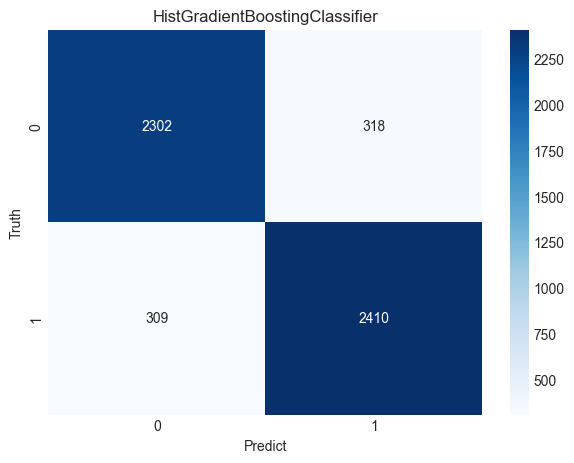

HistGradientBoostingClassifier :
[[2302  318]
 [ 309 2410]]
Accuracy Score:  0.8825622775800712

K-Fold Validation Mean Accuracy: 88.55 %

Standard Deviation: 0.72 %

ROC AUC Score: 0.88 %

Precision: 0.88 %

Recall: 0.89 %

F1 Score: 0.88 %

Cohen Score: 0.77 %
----------------------------------------

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10627, number of negative: 10726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 21353, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497682 -> initscore=-0.009273
[LightGBM] [Info] Start training from score -0.009273


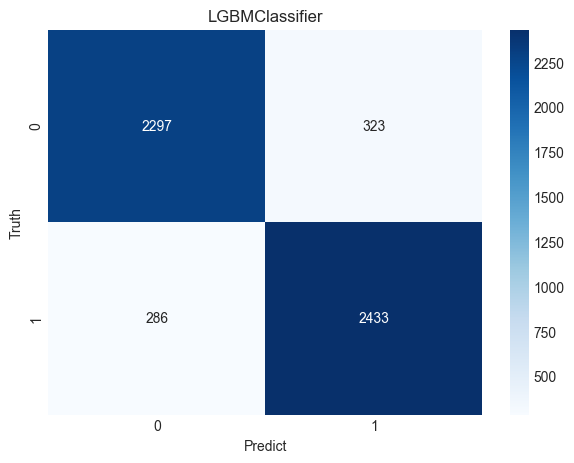

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9564, number of negative: 9653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 19217, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497684 -> initscore=-0.009263
[LightGBM] [Info] Start training from score -0.009263
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9564, number of negative: 9653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

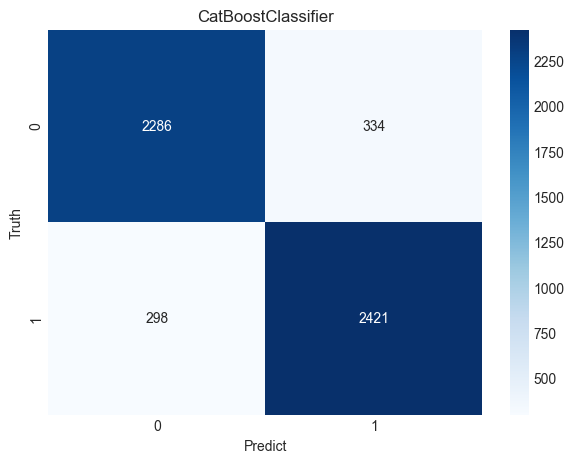

Learning rate set to 0.036397
0:	learn: 0.6607682	total: 12.9ms	remaining: 12.9s
1:	learn: 0.6312807	total: 23.6ms	remaining: 11.8s
2:	learn: 0.6036353	total: 35ms	remaining: 11.6s
3:	learn: 0.5800882	total: 44.4ms	remaining: 11.1s
4:	learn: 0.5584677	total: 56ms	remaining: 11.1s
5:	learn: 0.5379168	total: 66.3ms	remaining: 11s
6:	learn: 0.5194268	total: 75.7ms	remaining: 10.7s
7:	learn: 0.5019173	total: 89ms	remaining: 11s
8:	learn: 0.4862402	total: 101ms	remaining: 11.1s
9:	learn: 0.4728279	total: 114ms	remaining: 11.3s
10:	learn: 0.4605749	total: 126ms	remaining: 11.3s
11:	learn: 0.4497659	total: 140ms	remaining: 11.5s
12:	learn: 0.4392815	total: 152ms	remaining: 11.6s
13:	learn: 0.4297731	total: 165ms	remaining: 11.6s
14:	learn: 0.4207167	total: 180ms	remaining: 11.8s
15:	learn: 0.4131420	total: 189ms	remaining: 11.6s
16:	learn: 0.4066597	total: 203ms	remaining: 11.7s
17:	learn: 0.4006765	total: 215ms	remaining: 11.7s
18:	learn: 0.3942406	total: 227ms	remaining: 11.7s
19:	learn: 0.

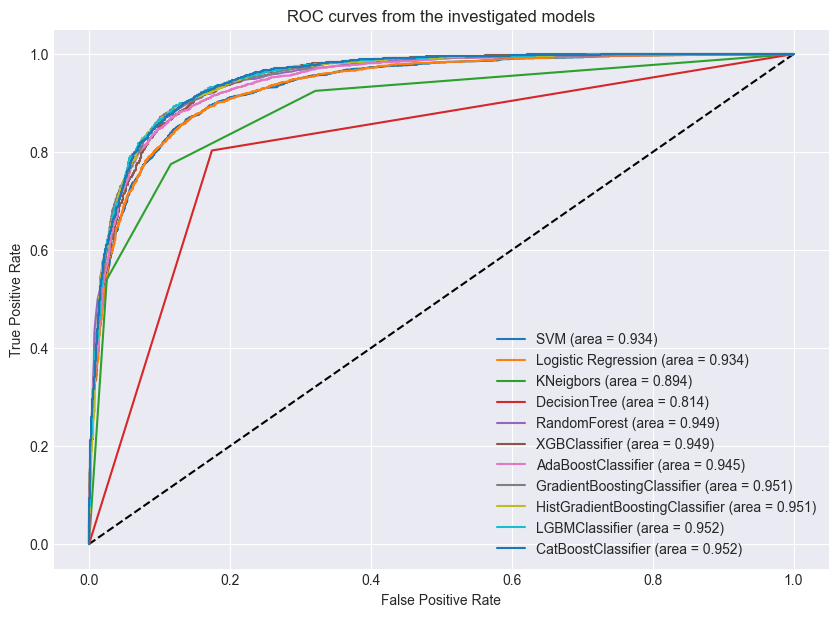

In [ ]:
X = df_smotetomek.drop(columns=['Depression'])
y = df_smotetomek['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
test_smotetomek = run_model(X_train, y_train, X_test, y_test, models, 10)


In [ ]:
test_smotetomek

Model   Accuracy  K-Fold Mean Accuracy  \
9                   LGBMClassifier  88.593370             88.704168   
7       GradientBoostingClassifier  88.406069             88.582393   
8   HistGradientBoostingClassifier  88.256228             88.554333   
10              CatBoostClassifier  88.162577             88.924302   
4                     RandomForest  87.937816             88.573025   
5                    XGBClassifier  87.656865             88.212472   
6               AdaBoostClassifier  87.600674             87.837765   
0                              SVM  86.401948             86.578014   
1              Logistic Regression  86.158457             86.755967   
2                        KNeigbors  82.861959             83.721338   
3                     DecisionTree  81.419742             82.498969   

    Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  Cohen-Kappa Score  
9        0.720444  0.885766   0.882801  0.894814  0.888767           0.771730  
7        0.657053  0.883996   0.885180  0.887459  0.886318           0.768030  
8        0.723214  0.882491   0.883431  0.886355  0.884891           0.765029  
10       0.818593  0.881460   0.878766  0.890401  0.884545           0.763111  
4        0.771610  0.879483   0.887561  0.873851  0.880652           0.758744  
5        0.859272  0.876495   0.877566  0.880471  0.879016           0.753037  
6        0.645754  0.875888   0.875228  0.882310  0.878755           0.751890  
0        0.843229  0.864001   0.867577  0.865024  0.866298           0.727961  
1        0.841769  0.861603   0.866667  0.860611  0.863628           0.723110  
2        0.783449  0.829627   0.873964  0.775285  0.821672           0.657851  
3        0.792703  0.814405   0.826959  0.803236  0.814925           0.628468

### Applying Smote-ENN



In [ ]:
from imblearn.combine import SMOTEENN

X = df.drop(['Depression'], axis = 1)
y = df['Depression']
smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X, y)
print(f'smote-enn dataset shape: {y_smoteenn.value_counts(normalize = True)}')
df_smoteenn = pd.DataFrame(X_smoteenn, columns=X.columns)
df_smoteenn['Depression'] = y_smoteenn
print("Updated DataFrame shape:", df_smoteenn.shape)
print("\nBefore Resampling:", Counter(y))
print("After Resampling:", Counter(y_smoteenn))
print("\n")
print(df_smoteenn['Depression'].value_counts())

smote-enn dataset shape: Depression
0    0.560797
1    0.439203
Name: proportion, dtype: float64
Updated DataFrame shape: (16917, 14)

Before Resampling: Counter({1: 13828, 0: 7952})
After Resampling: Counter({0: 9487, 1: 7430})


Depression
0    9487
1    7430
Name: count, dtype: int64


/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_2830/2884842143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_smoteenn['Depression'], palette=['lightcoral', 'lightblue'])


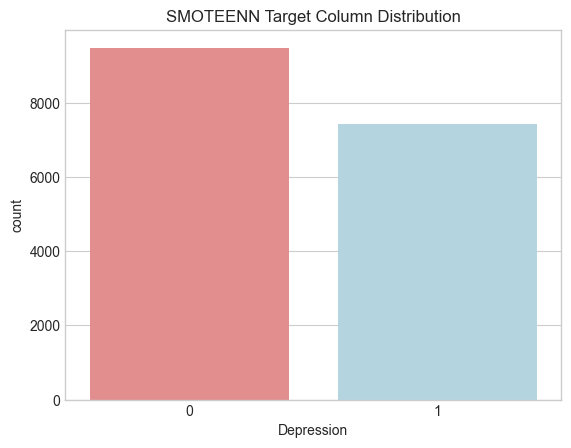

In [ ]:
sns.countplot(x=df_smoteenn['Depression'], palette=['lightcoral', 'lightblue'])
plt.title("SMOTEENN Target Column Distribution")
plt.show()

#### training model on smoteenn

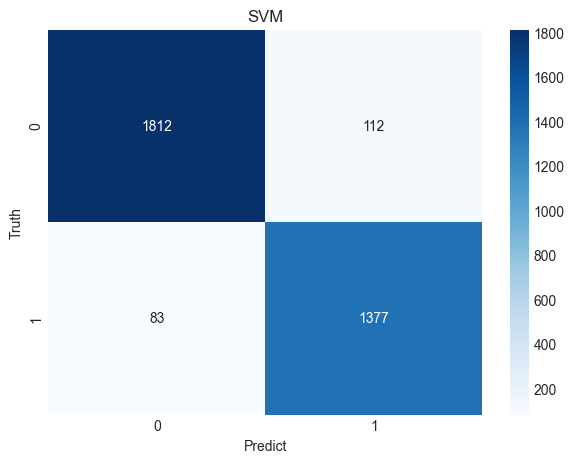

SVM :
[[1812  112]
 [  83 1377]]
Accuracy Score:  0.9423758865248227

K-Fold Validation Mean Accuracy: 94.49 %

Standard Deviation: 0.38 %

ROC AUC Score: 0.94 %

Precision: 0.92 %

Recall: 0.94 %

F1 Score: 0.93 %

Cohen Score: 0.88 %
----------------------------------------



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


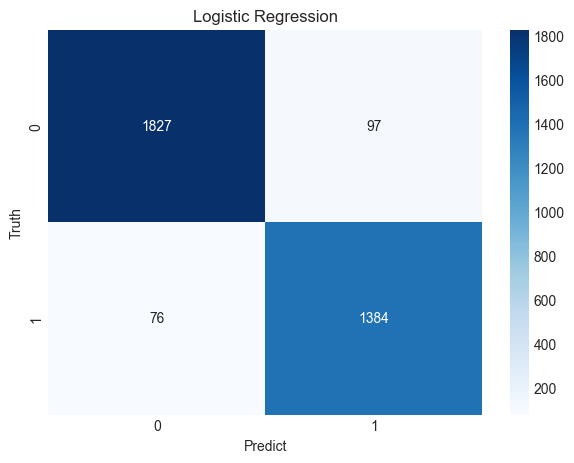

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression :
[[1827   97]
 [  76 1384]]
Accuracy Score:  0.9488770685579196

K-Fold Validation Mean Accuracy: 94.48 %

Standard Deviation: 0.55 %

ROC AUC Score: 0.95 %

Precision: 0.93 %

Recall: 0.95 %

F1 Score: 0.94 %

Cohen Score: 0.90 %
----------------------------------------



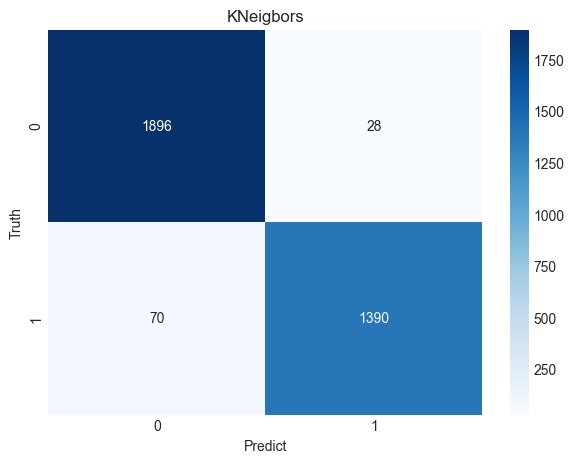

KNeigbors :
[[1896   28]
 [  70 1390]]
Accuracy Score:  0.9710401891252955

K-Fold Validation Mean Accuracy: 96.62 %

Standard Deviation: 0.49 %

ROC AUC Score: 0.97 %

Precision: 0.98 %

Recall: 0.95 %

F1 Score: 0.97 %

Cohen Score: 0.94 %
----------------------------------------



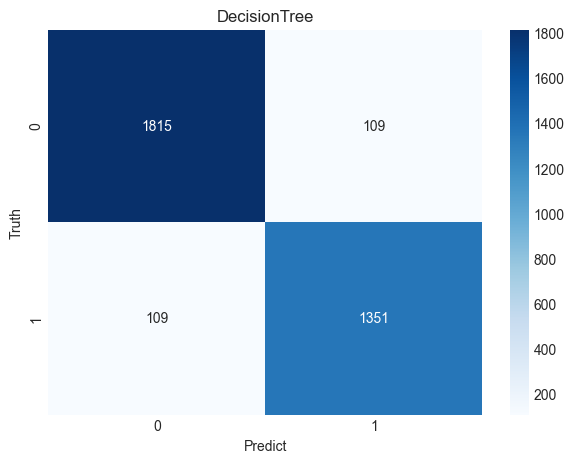

DecisionTree :
[[1815  109]
 [ 109 1351]]
Accuracy Score:  0.9355791962174941

K-Fold Validation Mean Accuracy: 93.88 %

Standard Deviation: 0.50 %

ROC AUC Score: 0.93 %

Precision: 0.93 %

Recall: 0.93 %

F1 Score: 0.93 %

Cohen Score: 0.87 %
----------------------------------------



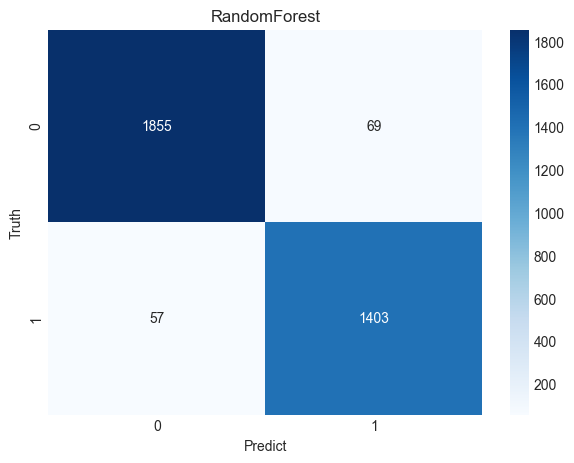

RandomForest :
[[1855   69]
 [  57 1403]]
Accuracy Score:  0.9627659574468085

K-Fold Validation Mean Accuracy: 96.14 %

Standard Deviation: 0.31 %

ROC AUC Score: 0.96 %

Precision: 0.95 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.92 %
----------------------------------------



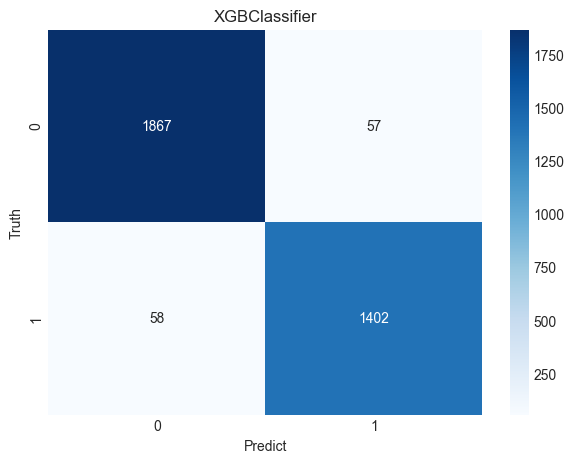

XGBClassifier :
[[1867   57]
 [  58 1402]]
Accuracy Score:  0.9660165484633569

K-Fold Validation Mean Accuracy: 96.36 %

Standard Deviation: 0.38 %

ROC AUC Score: 0.97 %

Precision: 0.96 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.93 %
----------------------------------------



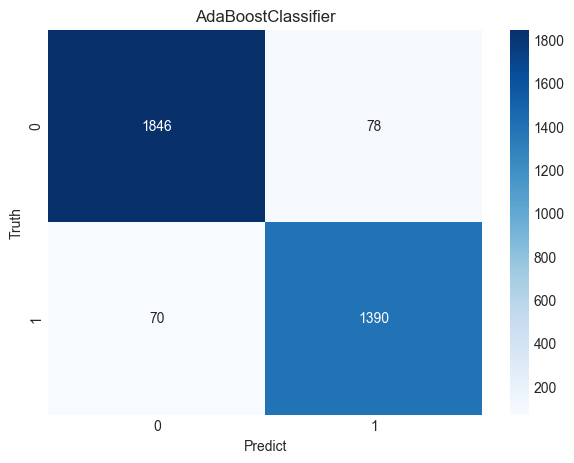

AdaBoostClassifier :
[[1846   78]
 [  70 1390]]
Accuracy Score:  0.9562647754137116

K-Fold Validation Mean Accuracy: 95.49 %

Standard Deviation: 0.48 %

ROC AUC Score: 0.96 %

Precision: 0.95 %

Recall: 0.95 %

F1 Score: 0.95 %

Cohen Score: 0.91 %
----------------------------------------



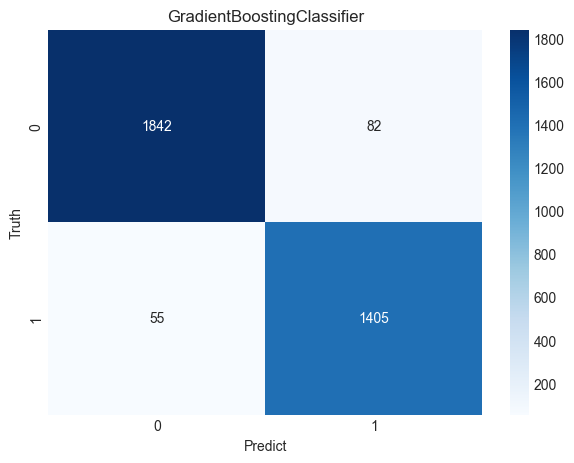

GradientBoostingClassifier :
[[1842   82]
 [  55 1405]]
Accuracy Score:  0.95951536643026

K-Fold Validation Mean Accuracy: 95.91 %

Standard Deviation: 0.33 %

ROC AUC Score: 0.96 %

Precision: 0.94 %

Recall: 0.96 %

F1 Score: 0.95 %

Cohen Score: 0.92 %
----------------------------------------



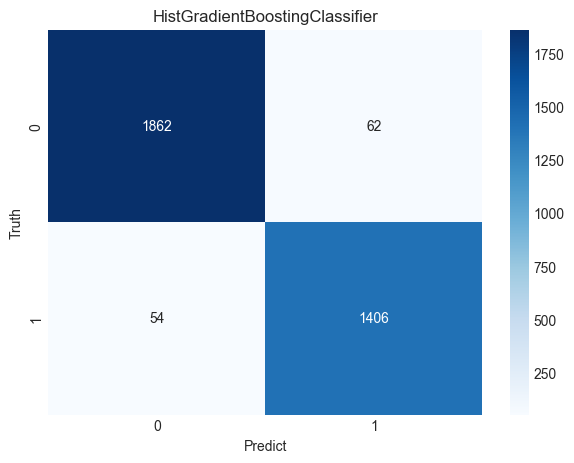

HistGradientBoostingClassifier :
[[1862   62]
 [  54 1406]]
Accuracy Score:  0.9657210401891253

K-Fold Validation Mean Accuracy: 96.28 %

Standard Deviation: 0.32 %

ROC AUC Score: 0.97 %

Precision: 0.96 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.93 %
----------------------------------------

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5970, number of negative: 7563
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 13533, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.441144 -> initscore=-0.236521
[LightGBM] [Info] Start training from score -0.236521


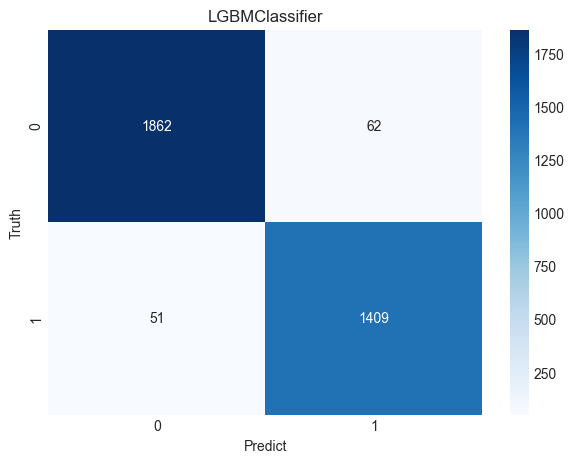

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5373, number of negative: 6806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 12179, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.441169 -> initscore=-0.236418
[LightGBM] [Info] Start training from score -0.236418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5373, number of negative: 6806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 12179, number of used fea

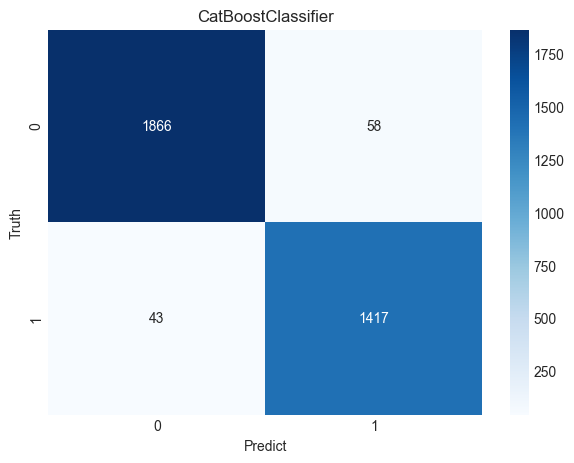

Learning rate set to 0.029956
0:	learn: 0.6382602	total: 3.44ms	remaining: 3.44s
1:	learn: 0.5918814	total: 6.03ms	remaining: 3.01s
2:	learn: 0.5453730	total: 9.56ms	remaining: 3.18s
3:	learn: 0.5080803	total: 14.3ms	remaining: 3.56s
4:	learn: 0.4740564	total: 17.5ms	remaining: 3.48s
5:	learn: 0.4409966	total: 21ms	remaining: 3.47s
6:	learn: 0.4126405	total: 24ms	remaining: 3.4s
7:	learn: 0.3879558	total: 27.7ms	remaining: 3.44s
8:	learn: 0.3672250	total: 31.3ms	remaining: 3.45s
9:	learn: 0.3472525	total: 35.2ms	remaining: 3.49s
10:	learn: 0.3302555	total: 37.8ms	remaining: 3.4s
11:	learn: 0.3158137	total: 40.6ms	remaining: 3.35s
12:	learn: 0.3010926	total: 43.9ms	remaining: 3.33s
13:	learn: 0.2890519	total: 46.8ms	remaining: 3.3s
14:	learn: 0.2781828	total: 50.2ms	remaining: 3.3s
15:	learn: 0.2675141	total: 53.1ms	remaining: 3.26s
16:	learn: 0.2577859	total: 55.7ms	remaining: 3.22s
17:	learn: 0.2490663	total: 58.3ms	remaining: 3.18s
18:	learn: 0.2403247	total: 61.5ms	remaining: 3.18s


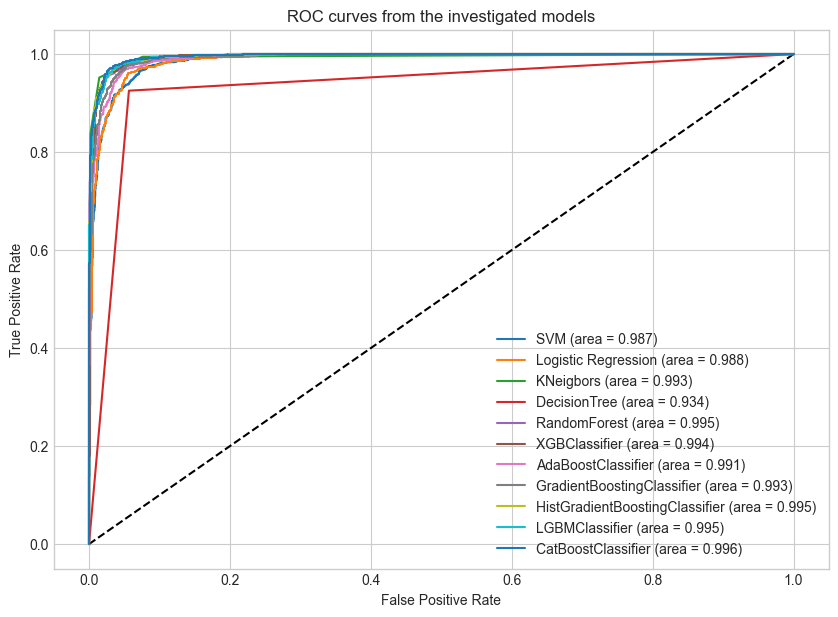

In [ ]:
X = df_smoteenn.drop(columns=['Depression'])
y = df_smoteenn['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
test_smoteenn = run_model(X_train, y_train, X_test, y_test, models, 10)


In [ ]:
test_smoteenn

Model   Accuracy  K-Fold Mean Accuracy  \
2                        KNeigbors  97.104019             96.615803   
10              CatBoostClassifier  97.015366             96.467940   
9                   LGBMClassifier  96.660757             96.312756   
5                    XGBClassifier  96.601655             96.357091   
8   HistGradientBoostingClassifier  96.572104             96.283171   
4                     RandomForest  96.276596             96.135389   
7       GradientBoostingClassifier  95.951537             95.906345   
6               AdaBoostClassifier  95.626478             95.492570   
1              Logistic Regression  94.887707             94.480191   
0                              SVM  94.237589             94.494908   
3                     DecisionTree  93.557920             93.881647   

    Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  Cohen-Kappa Score  
2        0.485645  0.968751   0.980254  0.952055  0.965949           0.940765  
10       0.355120  0.970201   0.960678  0.970548  0.965588           0.939239  
9        0.382833  0.966422   0.957852  0.965068  0.961447           0.931997  
5        0.382272  0.965324   0.960932  0.960274  0.960603           0.930725  
8        0.320325  0.965395   0.957766  0.963014  0.960383           0.930175  
4        0.308140  0.962548   0.953125  0.960959  0.957026           0.924180  
7        0.333576  0.959855   0.944855  0.962329  0.953512           0.917663  
6        0.475967  0.955757   0.946866  0.952055  0.949454           0.910912  
1        0.546821  0.948765   0.934504  0.947945  0.941176           0.895975  
0        0.379087  0.942469   0.924782  0.943151  0.933876           0.882824  
3        0.501667  0.934345   0.925342  0.925342  0.925342           0.868690

In [ ]:
################################################################################################################################################################

## Chi Square

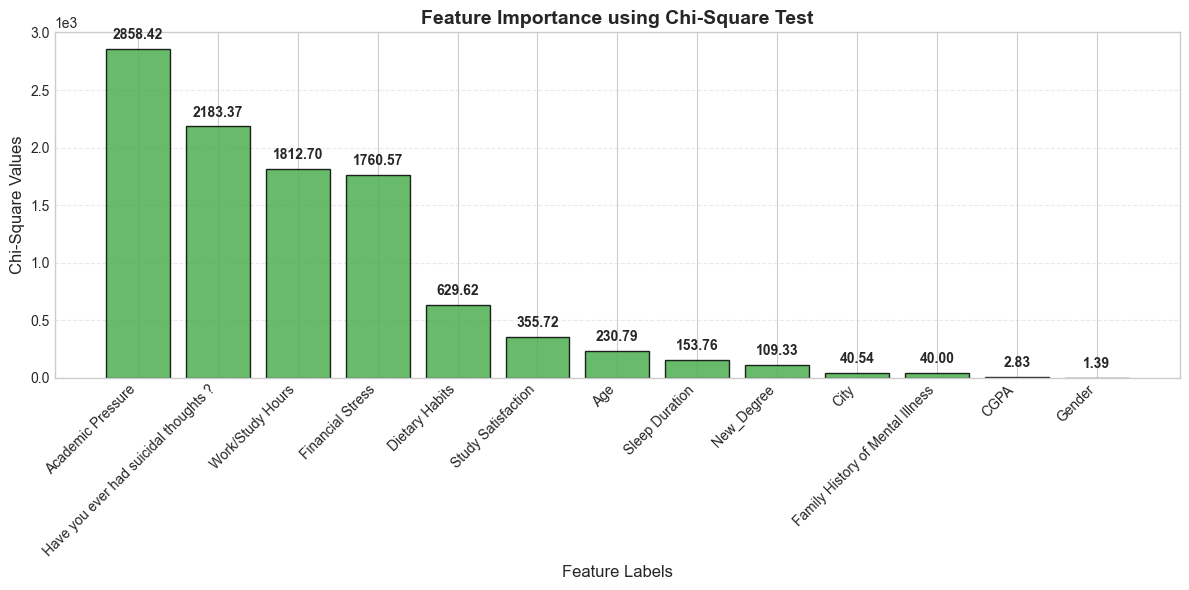

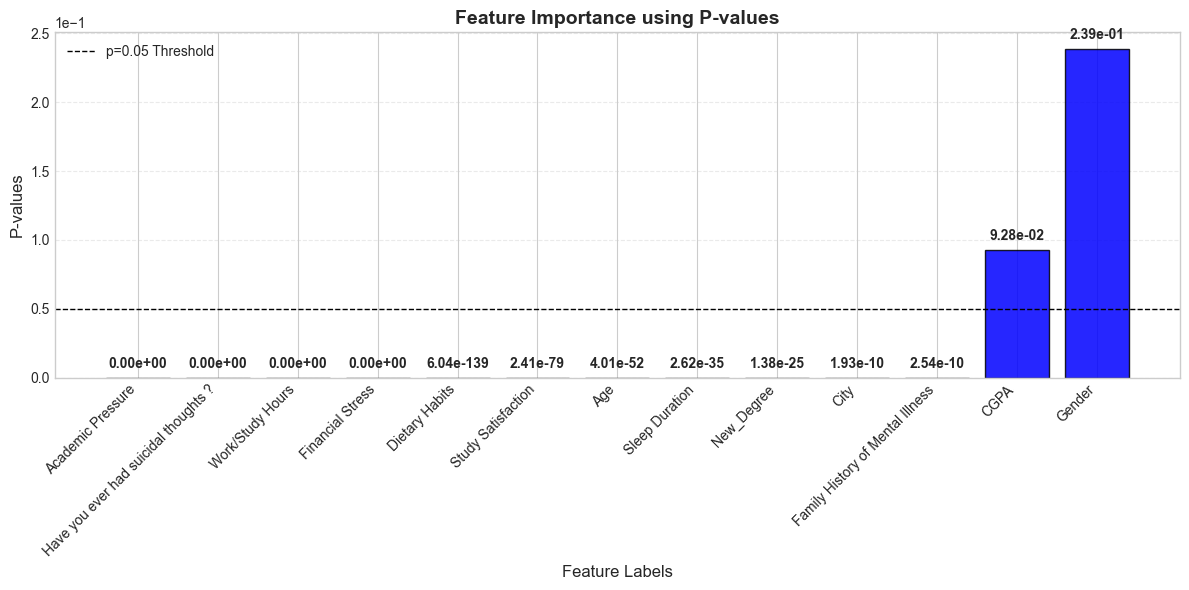

In [ ]:
from sklearn.feature_selection import chi2
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute Chi-square statistics
X = np.abs(X)  # Ensuring positive values for Chi-square test
chi_square = chi2(X, y)

# Extract values
chi_values = pd.Series(chi_square[0], index=X.columns).sort_values(ascending=False)
p_values = pd.Series(chi_square[1], index=X.columns).sort_values(ascending=True)

# ✅ **Chi-Square Values Visualization with Annotations**
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(chi_values.index, chi_values.values, color='#4CAF50', edgecolor='black', alpha=0.85)

# Add value labels (annotations)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',  # Rounded to 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset above bar
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# X-axis formatting
ax.set_xticks(range(len(chi_values.index)))
ax.set_xticklabels(chi_values.index, rotation=45, ha='right', fontsize=10)

# Y-axis formatting
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Labels and title
ax.set_xlabel('Feature Labels', fontsize=12)
ax.set_ylabel('Chi-Square Values', fontsize=12)
ax.set_title('Feature Importance using Chi-Square Test', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ✅ **P-Values Visualization with Annotations**
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['red' if p < 0.05 else 'blue' for p in p_values.values]  # Red = Significant

bars = ax.bar(p_values.index, p_values.values, color=colors, edgecolor='black', alpha=0.85)

# Add value labels (annotations)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2e}',  # Scientific notation for small values
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset above bar
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# X-axis formatting
ax.set_xticks(range(len(p_values.index)))
ax.set_xticklabels(p_values.index, rotation=45, ha='right', fontsize=10)

# Y-axis formatting
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Add significance threshold line
ax.axhline(y=0.05, color='black', linestyle='dashed', linewidth=1, label='p=0.05 Threshold')
ax.legend()

# Labels and title
ax.set_xlabel('Feature Labels', fontsize=12)
ax.set_ylabel('P-values', fontsize=12)
ax.set_title('Feature Importance using P-values', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import chi2

# Selecting categorical features (already encoded)
X = df.drop(columns=['Depression'])  # Assuming 'y' is the target variable
y = df['Depression']

# Chi-Square Test
chi_scores, p_values = chi2(X, y)

# Display results
print("Chi-Square Test Results:")
for col, chi, p in zip(X.columns, chi_scores, p_values):
    print(f"Feature: {col}")
    print(f"   Chi-Square Score: {chi}")
    print(f"   P-value: {p}")
    if p < 0.05:
        print("   ✅ Significant feature (Reject Null Hypothesis)")
    else:
        print("   ❌ Not significant (Fail to reject Null Hypothesis)")
    print("-" * 40)


Chi-Square Test Results:
Feature: Gender
   Chi-Square Score: 1.3877410484151322
   P-value: 0.23878695314847065
   ❌ Not significant (Fail to reject Null Hypothesis)
----------------------------------------
Feature: Age
   Chi-Square Score: 230.79108972570754
   P-value: 4.007009472121446e-52
   ✅ Significant feature (Reject Null Hypothesis)
----------------------------------------
Feature: City
   Chi-Square Score: 40.53658772507239
   P-value: 1.9296858410662918e-10
   ✅ Significant feature (Reject Null Hypothesis)
----------------------------------------
Feature: Academic Pressure
   Chi-Square Score: 2858.4174461727152
   P-value: 0.0
   ✅ Significant feature (Reject Null Hypothesis)
----------------------------------------
Feature: CGPA
   Chi-Square Score: 2.8259265790188137
   P-value: 0.09275334885603224
   ❌ Not significant (Fail to reject Null Hypothesis)
----------------------------------------
Feature: Study Satisfaction
   Chi-Square Score: 355.7200866079064
   P-value: 2

## LGBM Classifier Feature selection

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 1

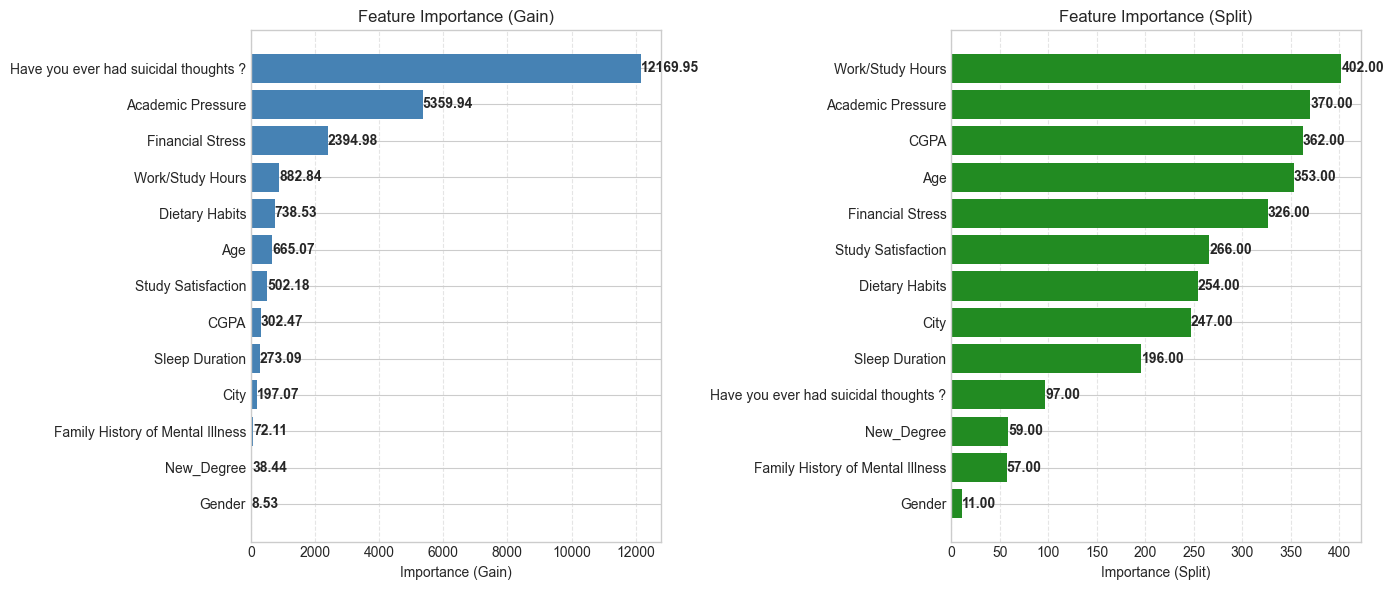

In [ ]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define features (X) and target variable (y)
X = df.drop(columns=['Depression'])
y = df['Depression']

# Split dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test)

# Define model parameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'rmse',           # Root Mean Squared Error as the evaluation metric
    'boosting_type': 'gbdt',     # Gradient Boosting Decision Tree
    'learning_rate': 0.05,       # Learning rate for training
    'max_depth': 6               # Maximum depth of trees
}

# Train model with early stopping
best_rmse = float('inf')
best_iteration = 0
patience = 10  # Stop training if no improvement after 10 iterations
patience_counter = 0

for num_round in range(1, 101):  # Train for up to 100 rounds
    model = lgb.train(params, lgb_train, num_boost_round=num_round)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    if rmse < best_rmse:
        best_rmse = rmse
        best_iteration = num_round
        patience_counter = 0  # Reset patience counter if RMSE improves
    else:
        patience_counter += 1  # Increment counter if no improvement

    if patience_counter >= patience:
        print(f"Early stopping at iteration {best_iteration} with RMSE: {best_rmse:.4f}")
        break

# Feature importance (Gain & Split)
feature_importance_gain = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)

feature_importance_split = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importance(importance_type='split')
}).sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(14, 6))

# Gain Importance
plt.subplot(1, 2, 1)
bars = plt.barh(feature_importance_gain['Feature'], feature_importance_gain['Importance'], color='steelblue')
plt.title('Feature Importance (Gain)')
plt.xlabel('Importance (Gain)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add annotations to Gain Importance plot
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', ha='left', va='center', fontsize=10, fontweight='bold')

# Split Importance
plt.subplot(1, 2, 2)
bars = plt.barh(feature_importance_split['Feature'], feature_importance_split['Importance'], color='forestgreen')
plt.title('Feature Importance (Split)')
plt.xlabel('Importance (Split)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add annotations to Split Importance plot
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
df_featured = df.drop(columns=["Family History of Mental Illness",'Gender', 'New_Degree'])

In [ ]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21780 entries, 1 to 27900
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    21780 non-null  float64
 1   City                                   21780 non-null  int64  
 2   Academic Pressure                      21780 non-null  float64
 3   CGPA                                   21780 non-null  float64
 4   Study Satisfaction                     21780 non-null  float64
 5   Sleep Duration                         21780 non-null  int64  
 6   Dietary Habits                         21780 non-null  int64  
 7   Have you ever had suicidal thoughts ?  21780 non-null  int64  
 8   Work/Study Hours                       21780 non-null  float64
 9   Financial Stress                       21780 non-null  float64
 10  Depression                             21780 non-null  int64  
dtypes: floa

# applying SHAP

[LightGBM] [Info] Number of positive: 11090, number of negative: 6334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 17424, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636478 -> initscore=0.560112
[LightGBM] [Info] Start training from score 0.560112


/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_1814/147015357.py:33: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=feature_names)


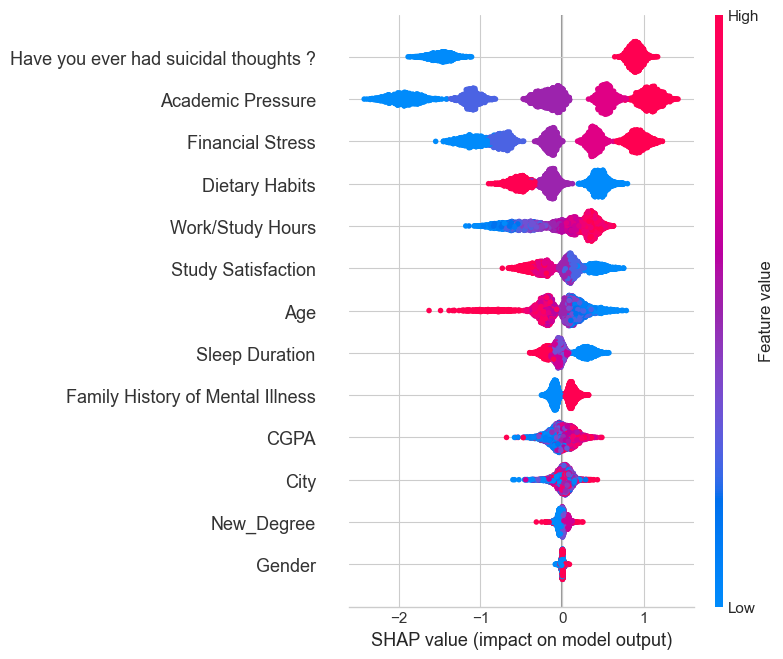

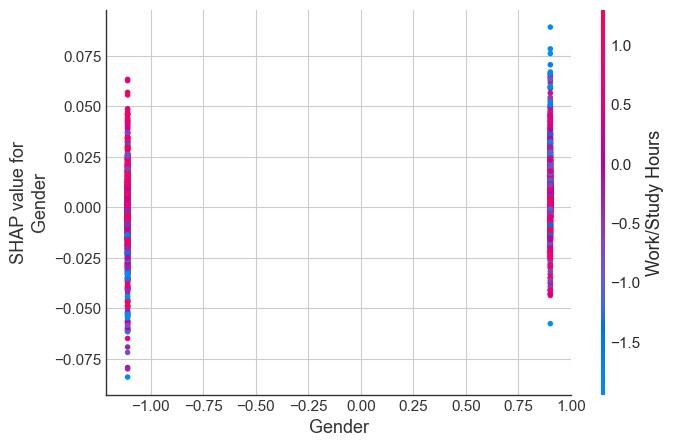

In [ ]:
import shap
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming df is your dataset, with the last column as the target variable
X = df.drop(columns=['Depression'])  # Assuming 'y' is the target variable
y = df['Depression']
# Get feature names
feature_names = X.columns

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (optional, but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)


# SH
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
shap.dependence_plot(feature_names[0], shap_values.values, X_test, feature_names=feature_names)


shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test[0], feature_names=feature_names)


[LightGBM] [Info] Number of positive: 11090, number of negative: 6334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 17424, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636478 -> initscore=0.560112
[LightGBM] [Info] Start training from score 0.560112


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model Accuracy: 0.8519


/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_1814/3385467597.py:50: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=feature_names)


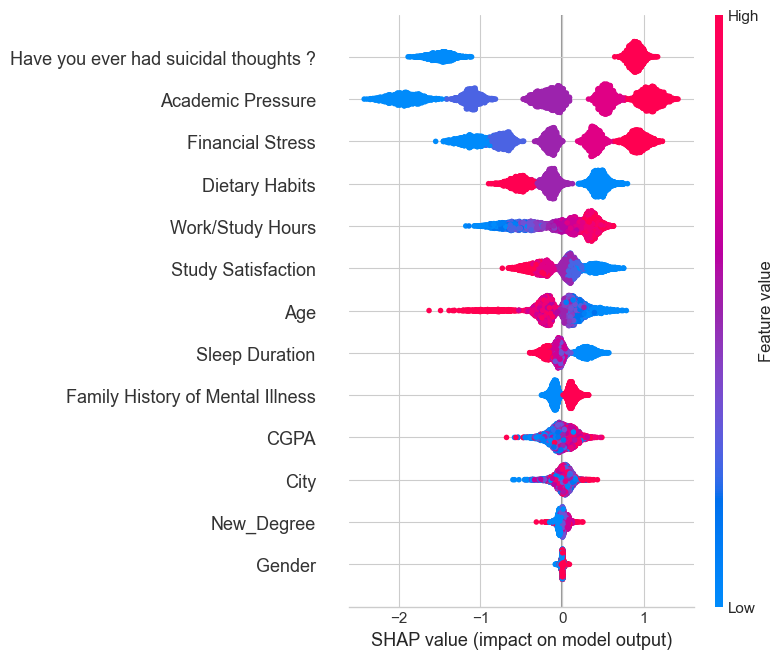

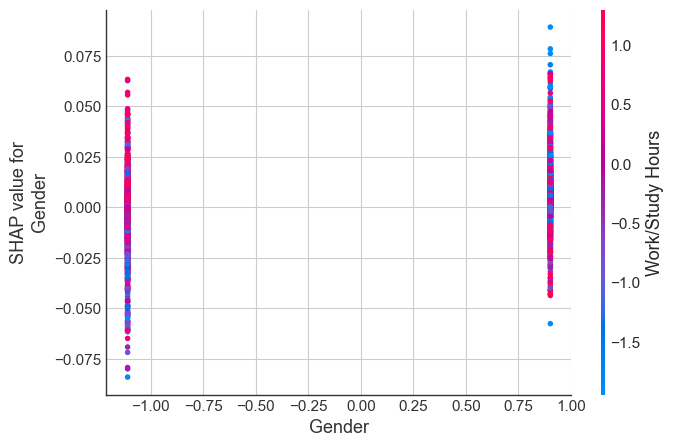

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
import shap
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Data Loading
def load_data():
    df = df # Replace with actual dataset path
    return df

# Step 2: Data Preprocessing
def preprocess_data(df):
    X = df.drop(columns=['Depression'])
    y = df['Depression']
    feature_names = X.columns
    return X, y, feature_names

# Step 3: Splitting Data
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Data Normalization
def normalize_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Step 5: Train Model
def train_model(X_train, y_train):
    model = lgb.LGBMClassifier()
    model.fit(X_train, y_train)
    return model

# Step 6: Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

# Step 7: SHAP Explanation
def shap_explanation(model, X_train, X_test, feature_names):
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

    # Summary Plot
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

    # Dependence Plot
    shap.dependence_plot(feature_names[0], shap_values.values, X_test, feature_names=feature_names)

    # Force Plot
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0], feature_names=feature_names)

# Waterfall Execution
if __name__ == "__main__":
    df = df
    X, y, feature_names = preprocess_data(df)
    X_train, X_test, y_train, y_test = split_data(X, y)
    X_train, X_test = normalize_data(X_train, X_test)
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    shap_explanation(model, X_train, X_test, feature_names)

### Applying Smote After Feature Selection

In [ ]:
X = df_featured.drop(columns=['Depression'])
y = df_featured['Depression']

# Apply SMOTE for oversampling

fsmote = SMOTE(sampling_strategy='auto', random_state=42)
X_fsmote, y_fsmote = fsmote.fit_resample(X, y)
df_fsmote = pd.DataFrame(X_fsmote, columns=X.columns)
df_fsmote['Depression'] = y_fsmote
print("Updated DataFrame shape:", df_fsmote.shape)
print("\nBefore Oversampling:", Counter(y))
print("After Oversampling:", Counter(y_fsmote))
print("\n")
print(df_fsmote['Depression'].value_counts())



Updated DataFrame shape: (27656, 11)

Before Oversampling: Counter({1: 13828, 0: 7952})
After Oversampling: Counter({0: 13828, 1: 13828})


Depression
0    13828
1    13828
Name: count, dtype: int64


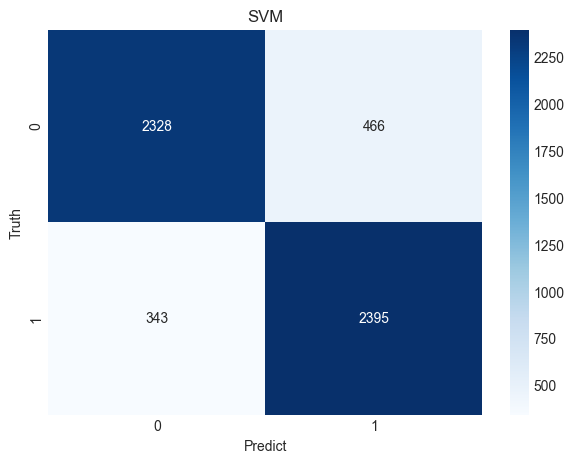

SVM :
[[2328  466]
 [ 343 2395]]
Accuracy Score:  0.853759942154736

K-Fold Validation Mean Accuracy: 85.37 %

Standard Deviation: 0.48 %

ROC AUC Score: 0.85 %

Precision: 0.84 %

Recall: 0.87 %

F1 Score: 0.86 %

Cohen Score: 0.71 %
----------------------------------------



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


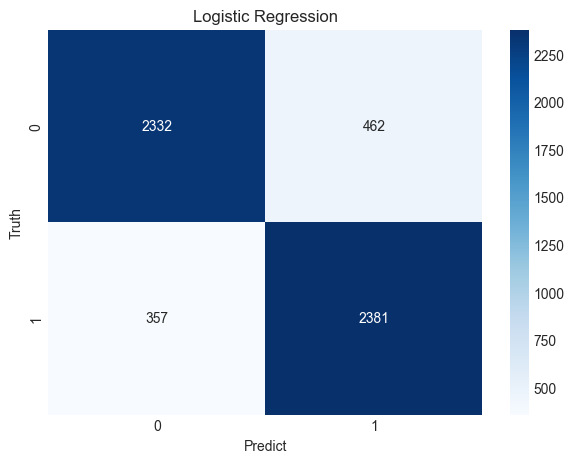

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression :
[[2332  462]
 [ 357 2381]]
Accuracy Score:  0.8519522776572668

K-Fold Validation Mean Accuracy: 85.43 %

Standard Deviation: 0.54 %

ROC AUC Score: 0.85 %

Precision: 0.84 %

Recall: 0.87 %

F1 Score: 0.85 %

Cohen Score: 0.70 %
----------------------------------------



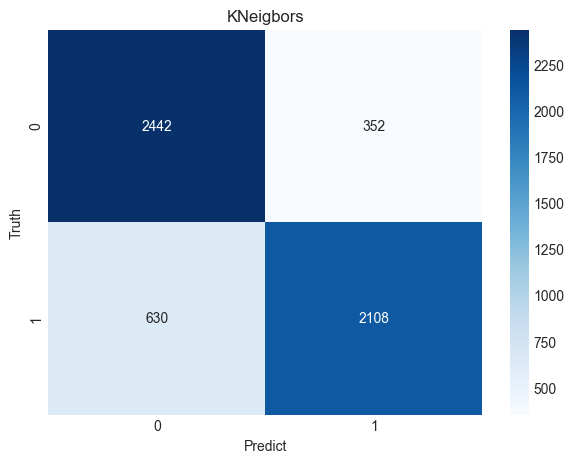

KNeigbors :
[[2442  352]
 [ 630 2108]]
Accuracy Score:  0.8224873463485177

K-Fold Validation Mean Accuracy: 81.59 %

Standard Deviation: 0.55 %

ROC AUC Score: 0.82 %

Precision: 0.86 %

Recall: 0.77 %

F1 Score: 0.81 %

Cohen Score: 0.64 %
----------------------------------------



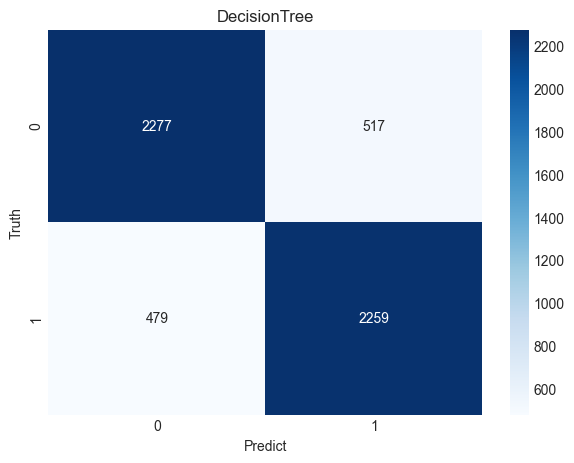

DecisionTree :
[[2277  517]
 [ 479 2259]]
Accuracy Score:  0.8199566160520607

K-Fold Validation Mean Accuracy: 81.25 %

Standard Deviation: 0.60 %

ROC AUC Score: 0.82 %

Precision: 0.81 %

Recall: 0.83 %

F1 Score: 0.82 %

Cohen Score: 0.64 %
----------------------------------------



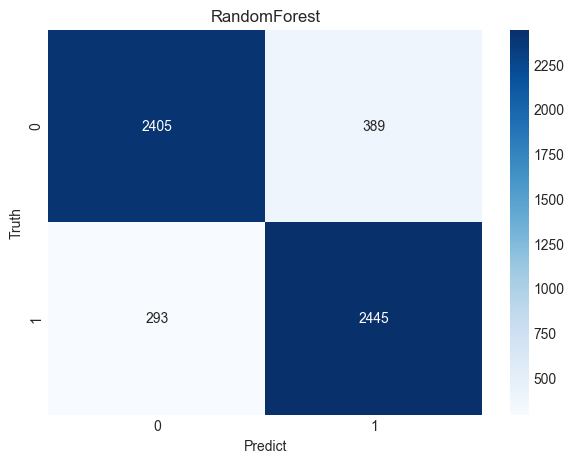

RandomForest :
[[2405  389]
 [ 293 2445]]
Accuracy Score:  0.8767172812725958

K-Fold Validation Mean Accuracy: 87.53 %

Standard Deviation: 0.52 %

ROC AUC Score: 0.88 %

Precision: 0.86 %

Recall: 0.89 %

F1 Score: 0.88 %

Cohen Score: 0.75 %
----------------------------------------



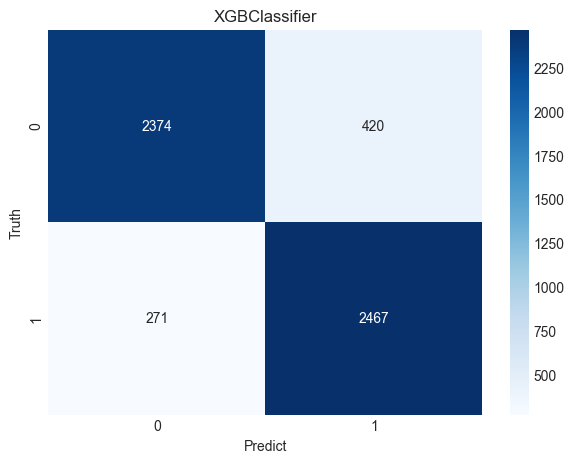

XGBClassifier :
[[2374  420]
 [ 271 2467]]
Accuracy Score:  0.8750903832248734

K-Fold Validation Mean Accuracy: 87.27 %

Standard Deviation: 0.32 %

ROC AUC Score: 0.88 %

Precision: 0.85 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.75 %
----------------------------------------



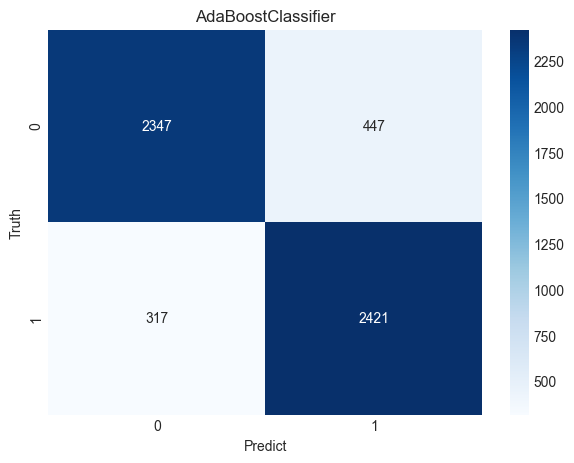

AdaBoostClassifier :
[[2347  447]
 [ 317 2421]]
Accuracy Score:  0.8618944323933478

K-Fold Validation Mean Accuracy: 86.40 %

Standard Deviation: 0.46 %

ROC AUC Score: 0.86 %

Precision: 0.84 %

Recall: 0.88 %

F1 Score: 0.86 %

Cohen Score: 0.72 %
----------------------------------------



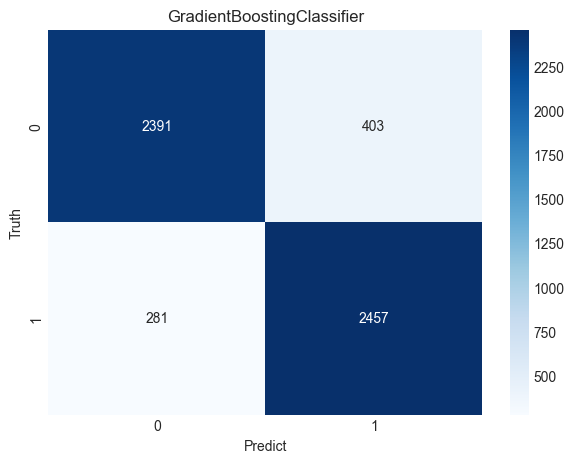

GradientBoostingClassifier :
[[2391  403]
 [ 281 2457]]
Accuracy Score:  0.8763557483731019

K-Fold Validation Mean Accuracy: 87.38 %

Standard Deviation: 0.40 %

ROC AUC Score: 0.88 %

Precision: 0.86 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.75 %
----------------------------------------



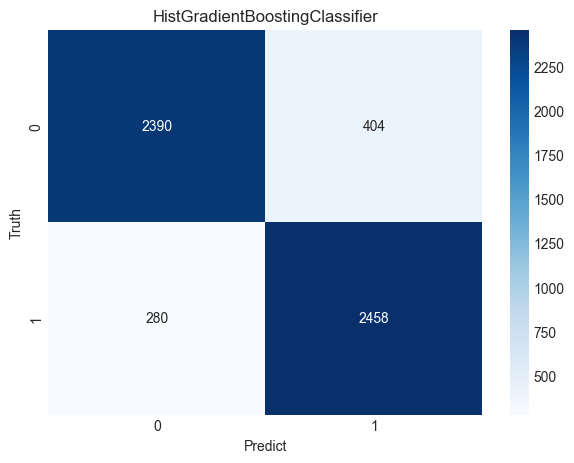

HistGradientBoostingClassifier :
[[2390  404]
 [ 280 2458]]
Accuracy Score:  0.8763557483731019

K-Fold Validation Mean Accuracy: 87.52 %

Standard Deviation: 0.37 %

ROC AUC Score: 0.88 %

Precision: 0.86 %

Recall: 0.90 %

F1 Score: 0.88 %

Cohen Score: 0.75 %
----------------------------------------

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11090, number of negative: 11034
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 22124, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501266 -> initscore=0.005062
[LightGBM] [Info] Start training from score 0.005062


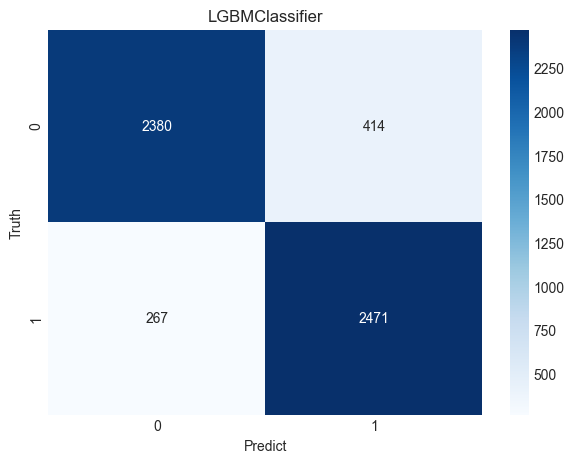

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9981, number of negative: 9930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1562
[LightGBM] [Info] Number of data points in the train set: 19911, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501281 -> initscore=0.005123
[LightGBM] [Info] Start training from score 0.005123
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9981, number of negative: 9930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

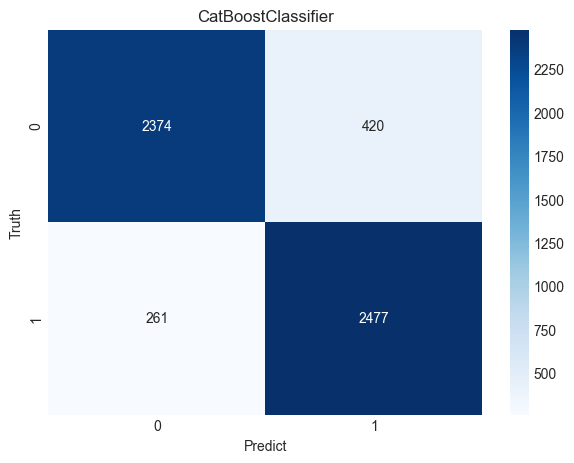

Learning rate set to 0.036953
0:	learn: 0.6621535	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6352519	total: 17.4ms	remaining: 8.7s
2:	learn: 0.6080808	total: 25.4ms	remaining: 8.44s
3:	learn: 0.5846512	total: 32.4ms	remaining: 8.05s
4:	learn: 0.5643457	total: 41.8ms	remaining: 8.32s
5:	learn: 0.5461014	total: 49.8ms	remaining: 8.26s
6:	learn: 0.5285959	total: 57.1ms	remaining: 8.09s
7:	learn: 0.5132542	total: 66.2ms	remaining: 8.21s
8:	learn: 0.4985167	total: 74.1ms	remaining: 8.16s
9:	learn: 0.4857028	total: 83.2ms	remaining: 8.24s
10:	learn: 0.4741035	total: 91.4ms	remaining: 8.22s
11:	learn: 0.4631319	total: 103ms	remaining: 8.51s
12:	learn: 0.4529537	total: 110ms	remaining: 8.39s
13:	learn: 0.4443466	total: 119ms	remaining: 8.4s
14:	learn: 0.4362820	total: 129ms	remaining: 8.47s
15:	learn: 0.4286671	total: 138ms	remaining: 8.48s
16:	learn: 0.4218552	total: 145ms	remaining: 8.39s
17:	learn: 0.4151952	total: 155ms	remaining: 8.46s
18:	learn: 0.4089951	total: 166ms	remaining: 8.54s
19

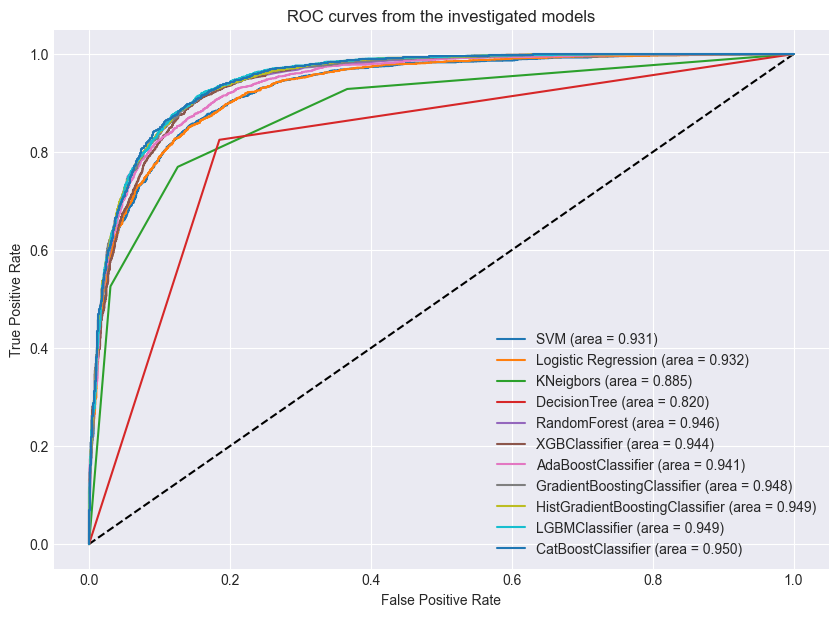

In [ ]:
X = df_fsmote.drop(columns=['Depression'])
y = df_fsmote['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
test_fsmote = run_model(X_train, y_train, X_test, y_test, models, 10)


In [ ]:
test_fsmote

Model   Accuracy  K-Fold Mean Accuracy  \
10              CatBoostClassifier  87.689805             87.850308   
9                   LGBMClassifier  87.689805             87.777934   
4                     RandomForest  87.671728             87.529368   
8   HistGradientBoostingClassifier  87.635575             87.524837   
7       GradientBoostingClassifier  87.635575             87.375685   
5                    XGBClassifier  87.509038             87.271736   
6               AdaBoostClassifier  86.189443             86.403900   
0                              SVM  85.375994             85.368785   
1              Logistic Regression  85.195228             85.432064   
2                        KNeigbors  82.248735             81.594632   
3                     DecisionTree  81.995662             81.251102   

    Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  Cohen-Kappa Score  
10       0.577571  0.877176   0.855022  0.904675  0.879148           0.753914  
9        0.453254  0.877154   0.856499  0.902484  0.878890           0.753903  
4        0.517006  0.876880   0.862738  0.892988  0.877602           0.753496  
8        0.370737  0.876570   0.858840  0.897736  0.877857           0.752798  
7        0.397119  0.876566   0.859091  0.897370  0.877814           0.752797  
5        0.315410  0.875350   0.854520  0.901023  0.877156           0.750291  
6        0.458777  0.862118   0.844142  0.884222  0.863717           0.723892  
0        0.478828  0.853970   0.837120  0.874726  0.855510           0.707622  
1        0.543170  0.852129   0.837496  0.869613  0.853252           0.703988  
2        0.551485  0.821960   0.856911  0.769905  0.811081           0.644577  
3        0.595703  0.820008   0.813761  0.825055  0.819369           0.639926

### Applying Smote-Tomek after Feature Selection




In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

X = df_featured.drop(columns=['Depression'])
y = df_featured['Depression']
fsmotetomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_fsmotetomek, y_fsmotetomek = fsmotetomek.fit_resample(X, y)
df_fsmotetomek = pd.DataFrame(X_fsmotetomek, columns=X.columns)
df_fsmotetomek['Depression'] = y_fsmotetomek
print("Updated DataFrame shape:", df_fsmotetomek.shape)
print("\nBefore Resampling:", Counter(y))
print("After Resampling:", Counter(y_fsmotetomek))
print("\n")
print(df_fsmotetomek['Depression'].value_counts())

Updated DataFrame shape: (26642, 11)

Before Resampling: Counter({1: 13828, 0: 7952})
After Resampling: Counter({0: 13321, 1: 13321})


Depression
0    13321
1    13321
Name: count, dtype: int64


#### training model

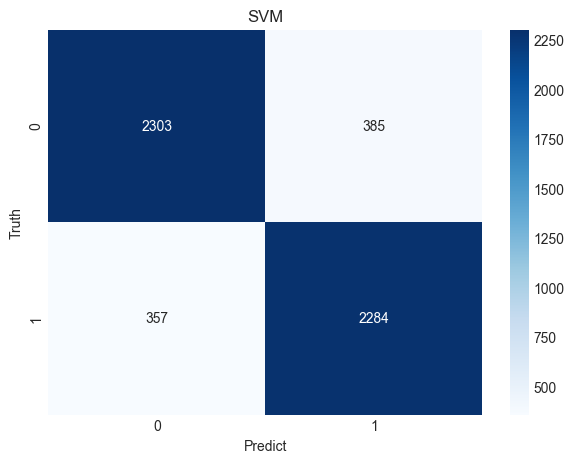

SVM :
[[2303  385]
 [ 357 2284]]
Accuracy Score:  0.8607618690185775

K-Fold Validation Mean Accuracy: 86.31 %

Standard Deviation: 0.59 %

ROC AUC Score: 0.86 %

Precision: 0.86 %

Recall: 0.86 %

F1 Score: 0.86 %

Cohen Score: 0.72 %
----------------------------------------



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


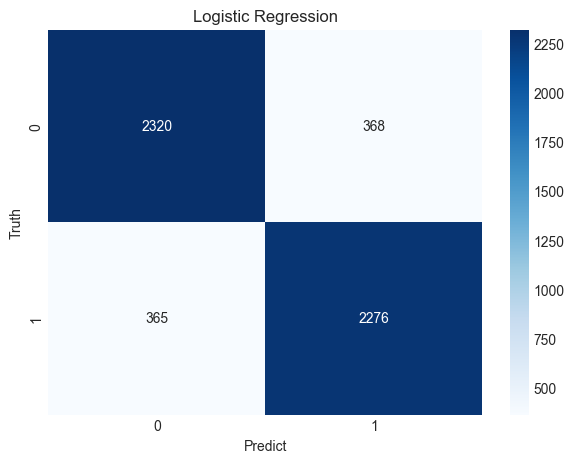

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression :
[[2320  368]
 [ 365 2276]]
Accuracy Score:  0.8624507412272472

K-Fold Validation Mean Accuracy: 86.28 %

Standard Deviation: 0.63 %

ROC AUC Score: 0.86 %

Precision: 0.86 %

Recall: 0.86 %

F1 Score: 0.86 %

Cohen Score: 0.72 %
----------------------------------------



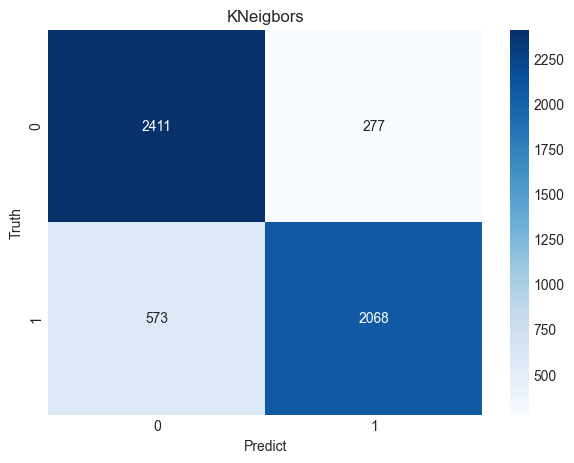

KNeigbors :
[[2411  277]
 [ 573 2068]]
Accuracy Score:  0.840495402514543

K-Fold Validation Mean Accuracy: 83.15 %

Standard Deviation: 0.76 %

ROC AUC Score: 0.84 %

Precision: 0.88 %

Recall: 0.78 %

F1 Score: 0.83 %

Cohen Score: 0.68 %
----------------------------------------



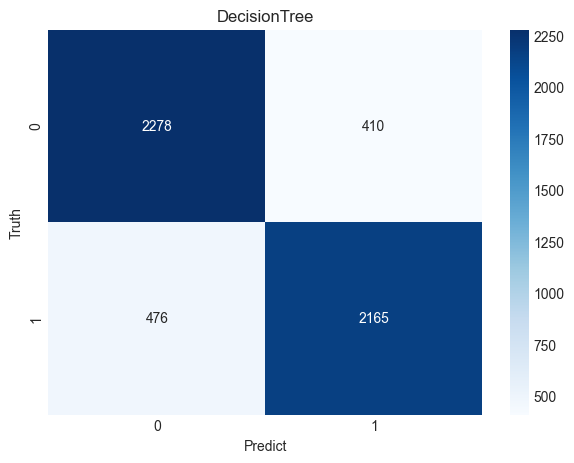

DecisionTree :
[[2278  410]
 [ 476 2165]]
Accuracy Score:  0.8337399136798649

K-Fold Validation Mean Accuracy: 82.86 %

Standard Deviation: 0.80 %

ROC AUC Score: 0.83 %

Precision: 0.84 %

Recall: 0.82 %

F1 Score: 0.83 %

Cohen Score: 0.67 %
----------------------------------------



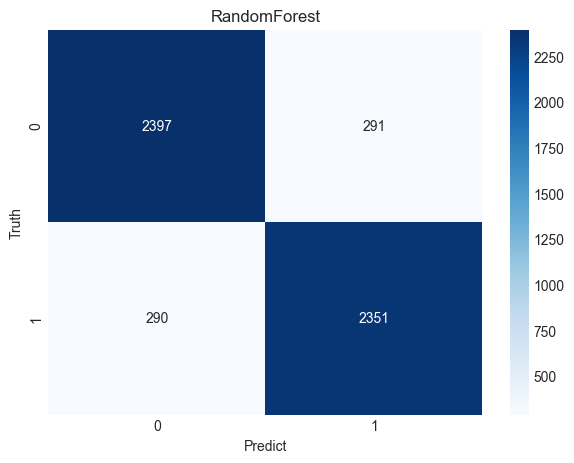

RandomForest :
[[2397  291]
 [ 290 2351]]
Accuracy Score:  0.8909739163069994

K-Fold Validation Mean Accuracy: 88.59 %

Standard Deviation: 0.37 %

ROC AUC Score: 0.89 %

Precision: 0.89 %

Recall: 0.89 %

F1 Score: 0.89 %

Cohen Score: 0.78 %
----------------------------------------



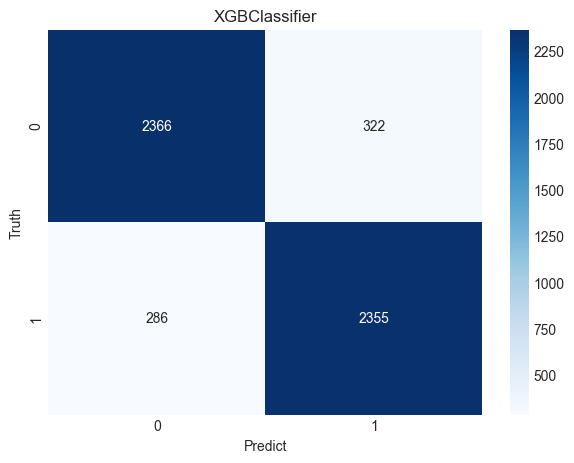

XGBClassifier :
[[2366  322]
 [ 286 2355]]
Accuracy Score:  0.8859072996809908

K-Fold Validation Mean Accuracy: 88.12 %

Standard Deviation: 0.37 %

ROC AUC Score: 0.89 %

Precision: 0.88 %

Recall: 0.89 %

F1 Score: 0.89 %

Cohen Score: 0.77 %
----------------------------------------



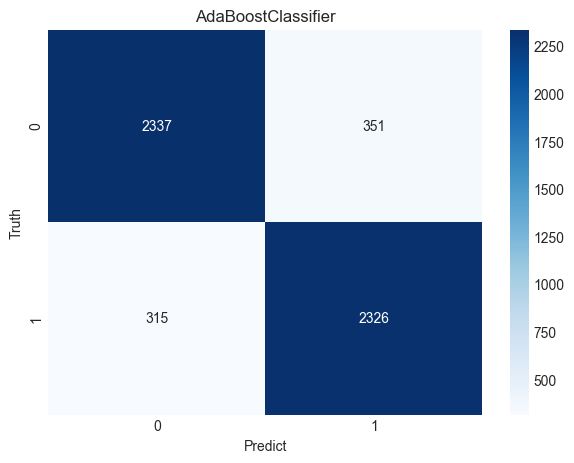

AdaBoostClassifier :
[[2337  351]
 [ 315 2326]]
Accuracy Score:  0.8750234565584537

K-Fold Validation Mean Accuracy: 87.28 %

Standard Deviation: 0.60 %

ROC AUC Score: 0.88 %

Precision: 0.87 %

Recall: 0.88 %

F1 Score: 0.87 %

Cohen Score: 0.75 %
----------------------------------------



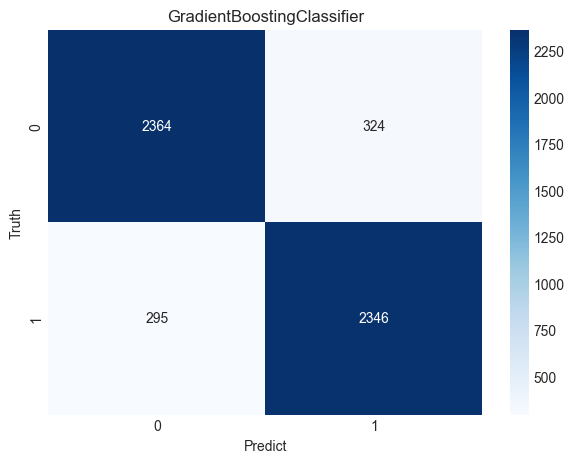

GradientBoostingClassifier :
[[2364  324]
 [ 295 2346]]
Accuracy Score:  0.8838431225370613

K-Fold Validation Mean Accuracy: 88.34 %

Standard Deviation: 0.71 %

ROC AUC Score: 0.88 %

Precision: 0.88 %

Recall: 0.89 %

F1 Score: 0.88 %

Cohen Score: 0.77 %
----------------------------------------



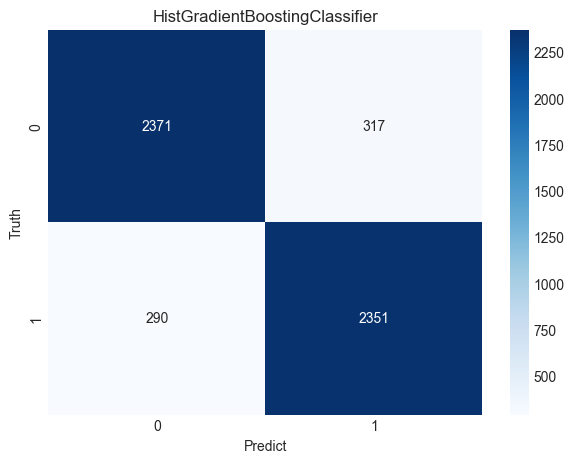

HistGradientBoostingClassifier :
[[2371  317]
 [ 290 2351]]
Accuracy Score:  0.8860949521486208

K-Fold Validation Mean Accuracy: 88.48 %

Standard Deviation: 0.53 %

ROC AUC Score: 0.89 %

Precision: 0.88 %

Recall: 0.89 %

F1 Score: 0.89 %

Cohen Score: 0.77 %
----------------------------------------

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10680, number of negative: 10633
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 21313, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501103 -> initscore=0.004410
[LightGBM] [Info] Start training from score 0.004410


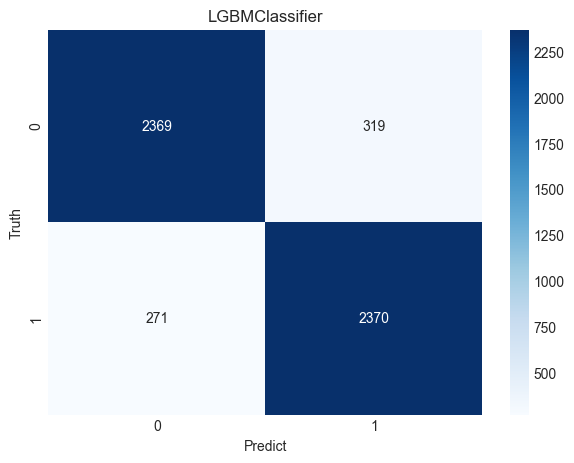

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9612, number of negative: 9569
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 19181, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501121 -> initscore=0.004484
[LightGBM] [Info] Start training from score 0.004484
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9612, number of negative: 9569
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 19181, number of used featu

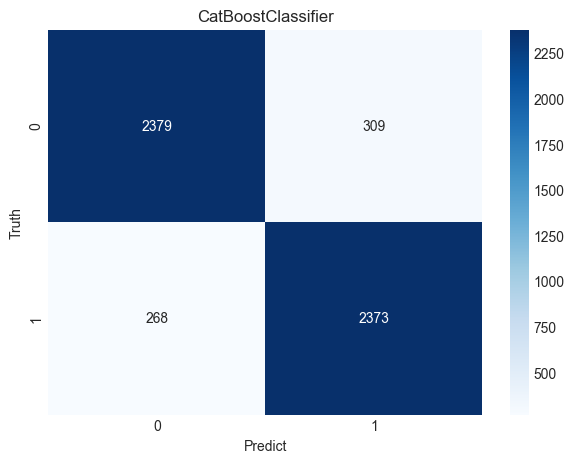

Learning rate set to 0.036368
0:	learn: 0.6635456	total: 2.91ms	remaining: 2.91s
1:	learn: 0.6345413	total: 15.1ms	remaining: 7.54s
2:	learn: 0.6064607	total: 19.5ms	remaining: 6.48s
3:	learn: 0.5813608	total: 23.1ms	remaining: 5.76s
4:	learn: 0.5593444	total: 26.8ms	remaining: 5.33s
5:	learn: 0.5391475	total: 30.1ms	remaining: 4.99s
6:	learn: 0.5205690	total: 34.6ms	remaining: 4.9s
7:	learn: 0.5038231	total: 38.8ms	remaining: 4.82s
8:	learn: 0.4878362	total: 42.4ms	remaining: 4.67s
9:	learn: 0.4744531	total: 45.9ms	remaining: 4.55s
10:	learn: 0.4607495	total: 49ms	remaining: 4.41s
11:	learn: 0.4491138	total: 52.6ms	remaining: 4.33s
12:	learn: 0.4387111	total: 55.9ms	remaining: 4.24s
13:	learn: 0.4293376	total: 59.2ms	remaining: 4.17s
14:	learn: 0.4208421	total: 62.8ms	remaining: 4.12s
15:	learn: 0.4125280	total: 67.1ms	remaining: 4.13s
16:	learn: 0.4048449	total: 70.4ms	remaining: 4.07s
17:	learn: 0.3984977	total: 73.8ms	remaining: 4.03s
18:	learn: 0.3926151	total: 77.3ms	remaining: 3

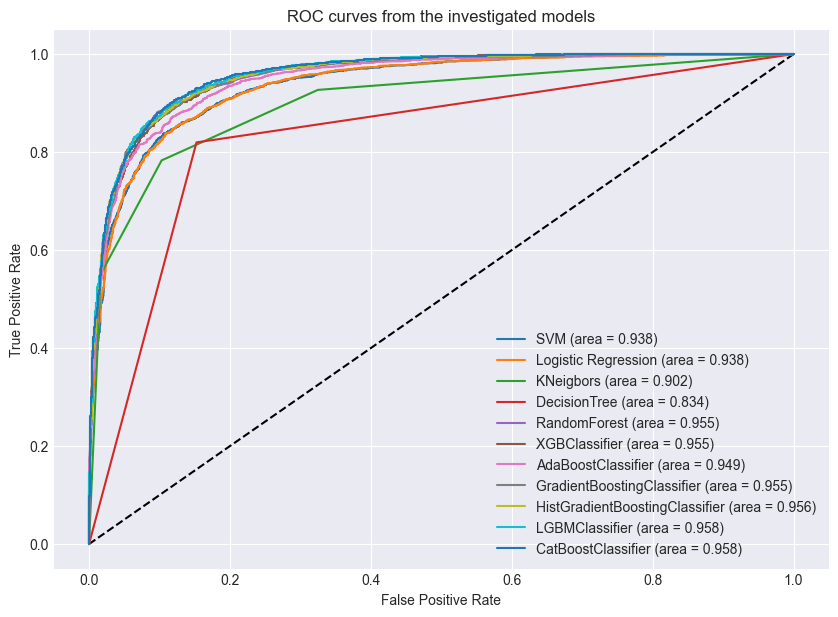

In [ ]:
X = df_fsmotetomek.drop(columns=['Depression'])
y = df_fsmotetomek['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
test_fsmotetomek = run_model(X_train, y_train, X_test, y_test, models, 10)


In [ ]:
test_fsmotetomek

Model   Accuracy  K-Fold Mean Accuracy  \
10              CatBoostClassifier  89.172453             88.509303   
4                     RandomForest  89.097392             88.593808   
9                   LGBMClassifier  88.928504             88.645390   
8   HistGradientBoostingClassifier  88.609495             88.476466   
5                    XGBClassifier  88.590730             88.119861   
7       GradientBoostingClassifier  88.384312             88.340402   
6               AdaBoostClassifier  87.502346             87.275313   
1              Logistic Regression  86.245074             86.275896   
0                              SVM  86.076187             86.313424   
2                        KNeigbors  84.049540             83.146379   
3                     DecisionTree  83.373991             82.860232   

    Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  Cohen-Kappa Score  
10       0.428153  0.891784   0.884787  0.898523  0.891602           0.783462  
4        0.365200  0.890967   0.889856  0.890193  0.890025           0.781932  
9        0.458264  0.889356   0.881369  0.897387  0.889306           0.778588  
8        0.534501  0.886131   0.881184  0.890193  0.885666           0.772193  
5        0.374887  0.885958   0.879716  0.891708  0.885671           0.771824  
7        0.705346  0.883882   0.878652  0.888300  0.883449           0.767690  
6        0.599012  0.875073   0.868883  0.880727  0.874765           0.750057  
1        0.634206  0.862445   0.860817  0.861795  0.861306           0.724883  
0        0.588908  0.860797   0.855751  0.864824  0.860264           0.721528  
2        0.755468  0.839993   0.881876  0.783037  0.829523           0.680653  
3        0.797575  0.833618   0.840777  0.819765  0.830138           0.667381

Random Search on feature selected smotetomek


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 📌 Step 1: Extract Features and Target
X = df_fsmotetomek.iloc[:, :-1]  # Features
y = df_fsmotetomek.iloc[:, -1]   # Target

# 📌 Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 3: Define the Model (Random Forest)
model = RandomForestClassifier(random_state=42)

# 📌 Step 4: Define Hyperparameter Search Space
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 📌 Step 5: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# 📌 Step 6: Best Model & Evaluation
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# 📌 Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# 📌 Step 8: Evaluate Performance
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.

Random Search on smotetomek


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 📌 Step 1: Extract Features and Target
X = df_smotetomek.iloc[:, :-1]  # Features
y = df_smotetomek.iloc[:, -1]   # Target

# 📌 Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 3: Define the Model (Random Forest)
model = RandomForestClassifier(random_state=42)

# 📌 Step 4: Define Hyperparameter Search Space
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 📌 Step 5: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# 📌 Step 6: Best Model & Evaluation
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# 📌 Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# 📌 Step 8: Evaluate Performance
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=16.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=16.3min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=16.3min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2,

### Applying Smote-ENN after Feature Selection


In [ ]:
from imblearn.combine import SMOTEENN

X = df_featured.drop(['Depression'], axis = 1)
y = df_featured['Depression']
fsmote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_fsmoteenn, y_fsmoteenn = fsmote_enn.fit_resample(X, y)
print(f'smote-enn dataset shape: {y_fsmoteenn.value_counts(normalize = True)}')
df_fsmoteenn = pd.DataFrame(X_fsmoteenn, columns=X.columns)
df_fsmoteenn['Depression'] = y_fsmoteenn
print("Updated DataFrame shape:", df_fsmoteenn.shape)
print("\nBefore Resampling:", Counter(y))
print("After Resampling:", Counter(y_fsmoteenn))
print("\n")
print(df_fsmoteenn['Depression'].value_counts())

smote-enn dataset shape: Depression
0    0.549608
1    0.450392
Name: proportion, dtype: float64
Updated DataFrame shape: (16983, 11)

Before Resampling: Counter({1: 13828, 0: 7952})
After Resampling: Counter({0: 9334, 1: 7649})


Depression
0    9334
1    7649
Name: count, dtype: int64


# Random Search on smote

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 📌 Step 1: Extract Features and Target
X = df_fsmote.iloc[:, :-1]  # Features
y = df_fsmote.iloc[:, -1]   # Target

# 📌 Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 3: Define the Model (Random Forest)
model = RandomForestClassifier(random_state=42)

# 📌 Step 4: Define Hyperparameter Search Space
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 📌 Step 5: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# 📌 Step 6: Best Model & Evaluation
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# 📌 Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# 📌 Step 8: Evaluate Performance
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.

# Random Search on SMOTETOMEK

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 📌 Step 1: Extract Features and Target
X = df_fsmotetomek.iloc[:, :-1]  # Features
y = df_fsmotetomek.iloc[:, -1]   # Target

# 📌 Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 3: Define the Model (Random Forest)
model = RandomForestClassifier(random_state=42)

# 📌 Step 4: Define Hyperparameter Search Space
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 📌 Step 5: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# 📌 Step 6: Best Model & Evaluation
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# 📌 Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# 📌 Step 8: Evaluate Performance
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  11.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  10.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   7.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   7.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   7.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf

# Random Search on smoteenn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 📌 Step 1: Extract Features and Target
X = df_fsmoteenn.iloc[:, :-1]  # Features
y = df_fsmoteenn.iloc[:, -1]   # Target

# 📌 Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 3: Define the Model (Random Forest)
model = RandomForestClassifier(random_state=42)

# 📌 Step 4: Define Hyperparameter Search Space
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 📌 Step 5: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

# 📌 Step 6: Best Model & Evaluation
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# 📌 Step 7: Make Predictions
y_pred = best_model.predict(X_test)

# 📌 Step 8: Evaluate Performance
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.

#### training model on smoteenn

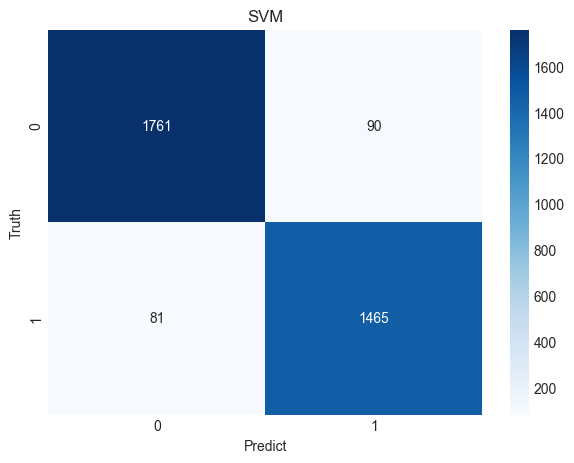

SVM :
[[1761   90]
 [  81 1465]]
Accuracy Score:  0.9496614659994113

K-Fold Validation Mean Accuracy: 94.60 %

Standard Deviation: 0.75 %

ROC AUC Score: 0.95 %

Precision: 0.94 %

Recall: 0.95 %

F1 Score: 0.94 %

Cohen Score: 0.90 %
----------------------------------------



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


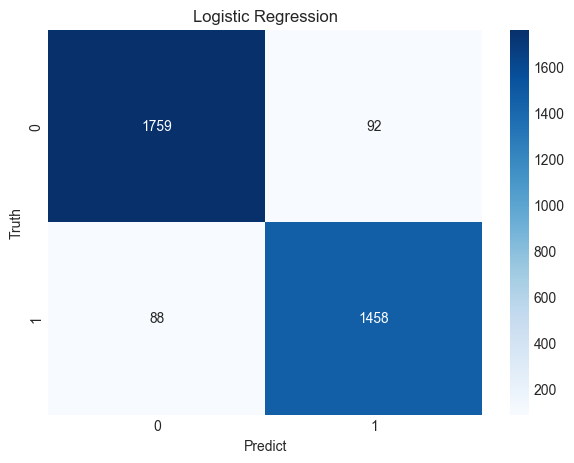

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression :
[[1759   92]
 [  88 1458]]
Accuracy Score:  0.9470120694730645

K-Fold Validation Mean Accuracy: 94.71 %

Standard Deviation: 0.86 %

ROC AUC Score: 0.95 %

Precision: 0.94 %

Recall: 0.94 %

F1 Score: 0.94 %

Cohen Score: 0.89 %
----------------------------------------



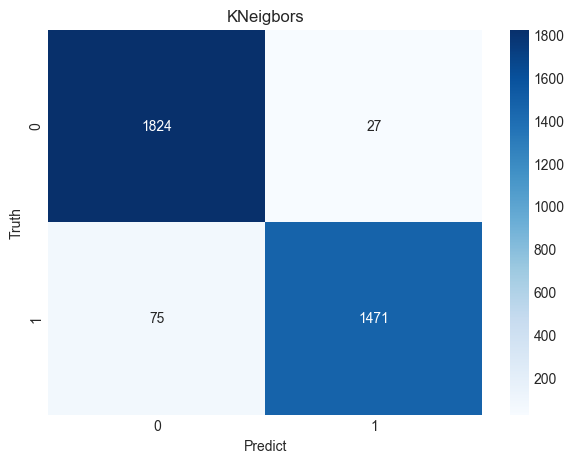

KNeigbors :
[[1824   27]
 [  75 1471]]
Accuracy Score:  0.9699735060347365

K-Fold Validation Mean Accuracy: 96.74 %

Standard Deviation: 0.59 %

ROC AUC Score: 0.97 %

Precision: 0.98 %

Recall: 0.95 %

F1 Score: 0.97 %

Cohen Score: 0.94 %
----------------------------------------



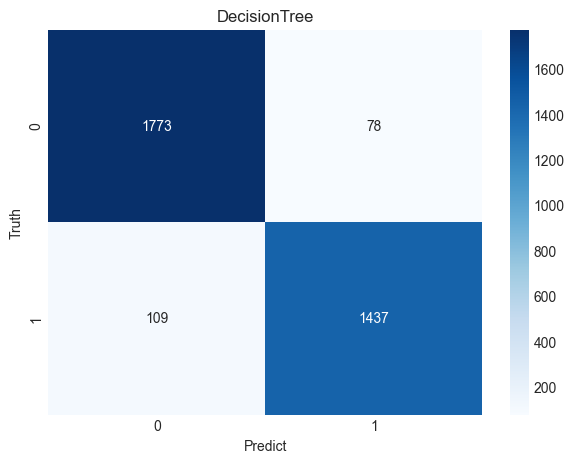

DecisionTree :
[[1773   78]
 [ 109 1437]]
Accuracy Score:  0.9449514277303503

K-Fold Validation Mean Accuracy: 94.13 %

Standard Deviation: 0.30 %

ROC AUC Score: 0.94 %

Precision: 0.95 %

Recall: 0.93 %

F1 Score: 0.94 %

Cohen Score: 0.89 %
----------------------------------------



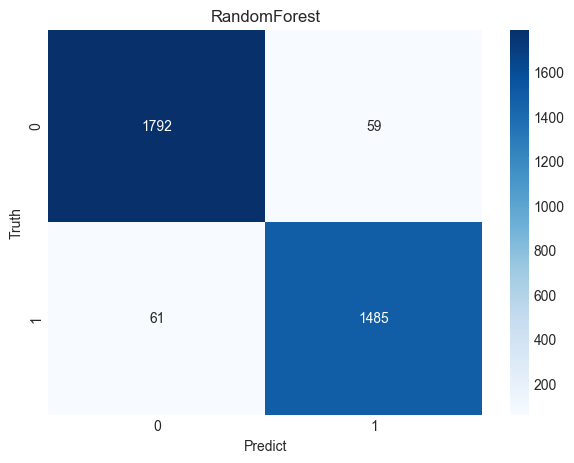

RandomForest :
[[1792   59]
 [  61 1485]]
Accuracy Score:  0.964674712982043

K-Fold Validation Mean Accuracy: 96.42 %

Standard Deviation: 0.65 %

ROC AUC Score: 0.96 %

Precision: 0.96 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.93 %
----------------------------------------



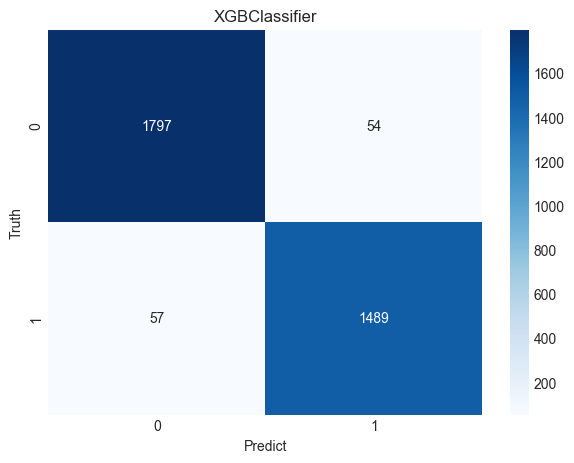

XGBClassifier :
[[1797   54]
 [  57 1489]]
Accuracy Score:  0.9673241095083898

K-Fold Validation Mean Accuracy: 96.71 %

Standard Deviation: 0.35 %

ROC AUC Score: 0.97 %

Precision: 0.97 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.93 %
----------------------------------------



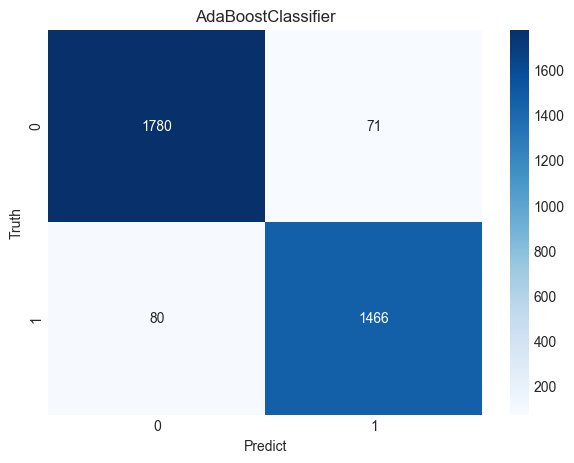

AdaBoostClassifier :
[[1780   71]
 [  80 1466]]
Accuracy Score:  0.9555490138357374

K-Fold Validation Mean Accuracy: 95.71 %

Standard Deviation: 0.67 %

ROC AUC Score: 0.95 %

Precision: 0.95 %

Recall: 0.95 %

F1 Score: 0.95 %

Cohen Score: 0.91 %
----------------------------------------



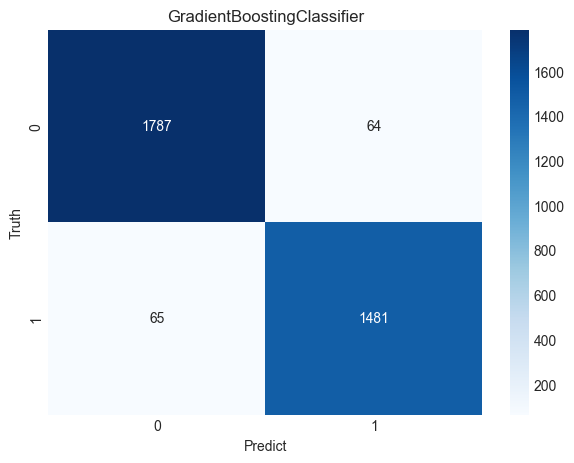

GradientBoostingClassifier :
[[1787   64]
 [  65 1481]]
Accuracy Score:  0.9620253164556962

K-Fold Validation Mean Accuracy: 96.27 %

Standard Deviation: 0.53 %

ROC AUC Score: 0.96 %

Precision: 0.96 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.92 %
----------------------------------------



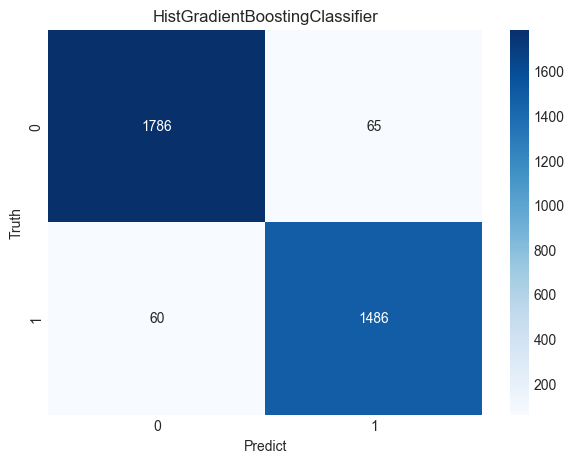

HistGradientBoostingClassifier :
[[1786   65]
 [  60 1486]]
Accuracy Score:  0.9632028260229615

K-Fold Validation Mean Accuracy: 96.57 %

Standard Deviation: 0.47 %

ROC AUC Score: 0.96 %

Precision: 0.96 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.93 %
----------------------------------------

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6103, number of negative: 7483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 13586, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.449212 -> initscore=-0.203853
[LightGBM] [Info] Start training from score -0.203853


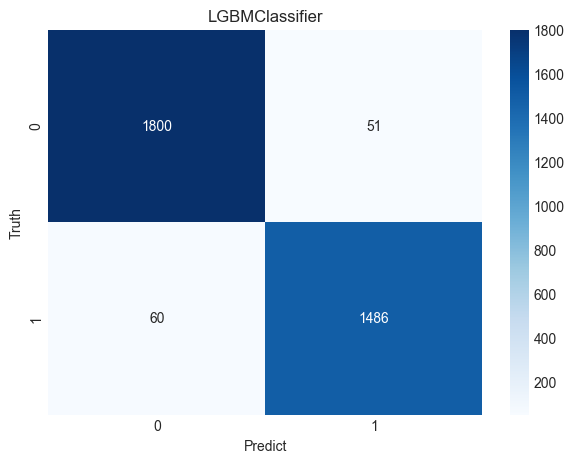

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5493, number of negative: 6734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1565
[LightGBM] [Info] Number of data points in the train set: 12227, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.449252 -> initscore=-0.203695
[LightGBM] [Info] Start training from score -0.203695
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5493, number of negative: 6734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 12227, number of used fea

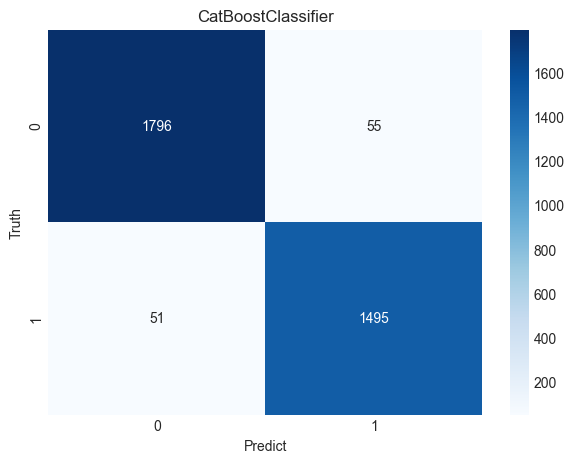

Learning rate set to 0.030007
0:	learn: 0.6406090	total: 3.26ms	remaining: 3.26s
1:	learn: 0.5915329	total: 5.45ms	remaining: 2.72s
2:	learn: 0.5449088	total: 7.87ms	remaining: 2.62s
3:	learn: 0.5070245	total: 10.6ms	remaining: 2.64s
4:	learn: 0.4749781	total: 13.5ms	remaining: 2.69s
5:	learn: 0.4421385	total: 16.3ms	remaining: 2.69s
6:	learn: 0.4134952	total: 19.3ms	remaining: 2.73s
7:	learn: 0.3894549	total: 22.2ms	remaining: 2.75s
8:	learn: 0.3663546	total: 25.1ms	remaining: 2.77s
9:	learn: 0.3460918	total: 27.8ms	remaining: 2.75s
10:	learn: 0.3309531	total: 30.4ms	remaining: 2.73s
11:	learn: 0.3135410	total: 33.6ms	remaining: 2.77s
12:	learn: 0.2999649	total: 36ms	remaining: 2.73s
13:	learn: 0.2863451	total: 38.3ms	remaining: 2.7s
14:	learn: 0.2747658	total: 40.8ms	remaining: 2.68s
15:	learn: 0.2631582	total: 43.3ms	remaining: 2.66s
16:	learn: 0.2537795	total: 46ms	remaining: 2.66s
17:	learn: 0.2458253	total: 48.5ms	remaining: 2.65s
18:	learn: 0.2370345	total: 51ms	remaining: 2.63s

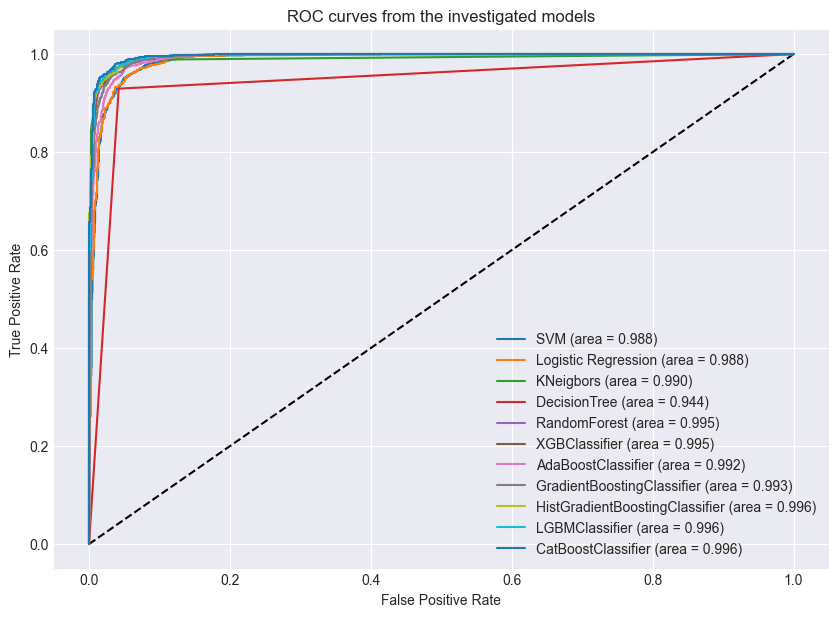

In [ ]:
X = df_fsmoteenn.drop(columns=['Depression'])
y = df_fsmoteenn['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
test_fsmoteenn = run_model(X_train, y_train, X_test, y_test, models, 10)


In [ ]:
test_fsmoteenn

Model   Accuracy  K-Fold Mean Accuracy  \
2                        KNeigbors  96.997351             96.739177   
10              CatBoostClassifier  96.879600             96.893800   
5                    XGBClassifier  96.732411             96.709804   
9                   LGBMClassifier  96.732411             96.592043   
4                     RandomForest  96.467471             96.422730   
8   HistGradientBoostingClassifier  96.320283             96.569897   
7       GradientBoostingClassifier  96.202532             96.268162   
6               AdaBoostClassifier  95.554901             95.708667   
0                              SVM  94.966147             94.597214   
1              Logistic Regression  94.701207             94.714926   
3                     DecisionTree  94.495143             94.133616   

    Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  Cohen-Kappa Score  
2        0.588578  0.968451   0.981976  0.951488  0.966491           0.939304  
10       0.459864  0.968649   0.964516  0.967012  0.965762           0.937098  
5        0.353544  0.966979   0.965003  0.963131  0.964066           0.934107  
9        0.434643  0.966819   0.966818  0.961190  0.963996           0.934085  
4        0.647245  0.964334   0.961788  0.960543  0.961165           0.928768  
8        0.470073  0.963037   0.958092  0.961190  0.959638           0.925827  
7        0.526036  0.961690   0.958576  0.957956  0.958266           0.923429  
6        0.669130  0.954948   0.953806  0.948254  0.951022           0.910333  
0        0.746221  0.949492   0.942122  0.947607  0.944856           0.898553  
1        0.859025  0.946688   0.940645  0.943079  0.941860           0.893186  
3        0.299203  0.943678   0.948515  0.929495  0.938909           0.888824